<font color='Black' size=8>1. Introduction</font>

In the begining, this is considered to be my graduation project; and in this project I am going to predict flight delays for a dataset i found that has been published by The U.S. Department of Transportation's -DOT- for all domestic flights in the United States of America in 2015. and in order to create my model i'm going to do the EDA to figure out which best parameters i should use to create a good model to predict both departure and Arrival delays, by creating two regressors for both targets.
As well in this study i'll try to figure convert my dataset into a classification problem by looking into the routs that is significantly delayed in order to warn the airlines to take precautiuons to avoid such delays that will cost the airlines a huge amount of money for hosting the passengers in hotels.

<font color='Black' size=5>1.1 Acknowledgements</font>
<br>
The U.S. Department of Transportation's (DOT) Bureau of Transportation Statistics tracks the on-time performance of domestic flights operated by large air carriers. Summary information on the number of on-time, delayed, canceled, and diverted flights is published in DOT's monthly Air Travel Consumer Report and in this dataset of 2015 flight delays and cancellations.

The flight delay and cancellation data was collected and published by the DOT's Bureau of Transportation Statistics.

It has been given here in the attached link; three data sets airlines.csv, airports.csv, and  flights.csv, and i'm going to describe the details oF the raw data during the EDA section that i'm gooing to use it in my model.

https://www.kaggle.com/usdot/flight-delays/version/1#



<font color='Black' size=6>2. EDA </font>
<br>
In the EDA section; I'm going first, to import all of my desirable packages, i can add later on new packages based on my needs and then I'll start to load my data frames from the given three data files.

<font color='Black' size=5>2.1 Import section</font>
<br>

In [1]:
import matplotlib
#matplotlib.use('Agg')
#font = {'family' : 'normal',
#        'weight' : 'bold',
#        'size'   : 12}
#matplotlib.rcParams('font', **font)
matplotlib.rcParams['font.weight']='bold'
#matplotlib.rcParams['font.family']='normal'
matplotlib.rcParams['font.size']=12


In [2]:
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import timedelta
from sklearn import model_selection, metrics,svm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Ridge,LogisticRegression
from sklearn.model_selection import cross_val_score,train_test_split, GridSearchCV
from sklearn.metrics import classification_report,average_precision_score,precision_recall_curve,roc_auc_score, roc_curve, classification_report, accuracy_score
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.base import TransformerMixin
from sklearn.datasets import make_regression
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier,AdaBoostRegressor,AdaBoostClassifier
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from scipy.stats import percentileofscore

/anaconda3/envs/py27conda/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


<font color='Black' size=5>2.2 Data Frames Load</font>
<br>
In this section I'm going to load all the three datasets Airlines, Airports, and Flights consequently into related data frames as follows:

<font color='Black' size=4>2.2.1 Airlines Data Frame Load</font>
<br>
Loading all airlines into df_airlines and try to see all features and columns in this dataframe

In [3]:
df_airlines = pd.read_csv("../../../../../sources/airlines.csv")

In [4]:
df_airlines.head()

IATA_CODE                 AIRLINE
0        UA   United Air Lines Inc.
1        AA  American Airlines Inc.
2        US         US Airways Inc.
3        F9  Frontier Airlines Inc.
4        B6         JetBlue Airways

In [5]:
df_airlines.describe()

IATA_CODE         AIRLINE
count         14              14
unique        14              14
top           DL  Virgin America
freq           1               1

In [6]:
df_airlines.shape

(14, 2)

In [7]:
df_airlines.columns

Index(['IATA_CODE', 'AIRLINE'], dtype='object')

<font color='Black' size=3>2.2.1.1 Airlines Data Frame Load Summary</font>
<br>

As can be seen, after loading all airlines into df_airlines that we have 12 different airlines, and it is mainly related to the domestic carriers inside the United States of America and the columns description and data types are as follows:

IATA_CODE: Airline Identifier --> of type(String)

AIRLINE: Airport's Name --> of type(String )



<font color='Black' size=4>2.2.2 Airports Data Frame Load</font>
<br>
Loading all airports into df_airports and try to see all features and columns in this data frame

In [8]:
df_airports = pd.read_csv("airports.csv")

In [9]:
df_airports.head()

IATA_CODE                              AIRPORT         CITY STATE COUNTRY  \
0       ABE  Lehigh Valley International Airport    Allentown    PA     USA   
1       ABI             Abilene Regional Airport      Abilene    TX     USA   
2       ABQ    Albuquerque International Sunport  Albuquerque    NM     USA   
3       ABR            Aberdeen Regional Airport     Aberdeen    SD     USA   
4       ABY   Southwest Georgia Regional Airport       Albany    GA     USA   

   LATITUDE  LONGITUDE  
0  40.65236  -75.44040  
1  32.41132  -99.68190  
2  35.04022 -106.60919  
3  45.44906  -98.42183  
4  31.53552  -84.19447

In [10]:
df_airports.describe()

LATITUDE   LONGITUDE
count  319.000000  319.000000
mean    38.981244  -98.378964
std      8.616736   21.523492
min     13.483450 -176.646030
25%     33.652040 -110.839385
50%     39.297610  -93.403070
75%     43.154675  -82.722995
max     71.285450  -64.798560

In [11]:
df_airports.shape

(322, 7)

In [12]:
df_airports.columns

Index(['IATA_CODE', 'AIRPORT', 'CITY', 'STATE', 'COUNTRY', 'LATITUDE',
       'LONGITUDE'],
      dtype='object')

<font color='Black' size=3>2.2.2.1 Airports Data Frame Load Summary</font>
<br>

As can be seen, after loading all airports into df_airports that we have 319 different airports, and it is mainly related to most of the registerred airports located in the United States of America and the columns description and data types are as follows:


IATA_CODE: Location Identifier --> of type(String)

AIRPORT: Airport's Name --> of type(String)

CITY: City Name of the Airport --> of type(String)

STATE: State Name of the Airport --> of type(String)

COUNTRY: Country Name of the Airport --> of type(String)

LATITUDE: Latitude of the Airport --> of type(Numeric)

LONGITUDE: Longitude of the Airport --> of type(Numeric)



<font color='Black' size=4>2.2.3 Flights Data Frame Load</font>
<br>
Loading all domestic flights into df_flights and try to see all features and columns in this data frame

In [13]:
df_flights = pd.read_csv("../../../../../sources/flights.csv")

/anaconda3/envs/py27conda/anaconda/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [14]:
df_flights.head()

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4      AS             98      N407AS   
1  2015      1    1            4      AA           2336      N3KUAA   
2  2015      1    1            4      US            840      N171US   
3  2015      1    1            4      AA            258      N3HYAA   
4  2015      1    1            4      AS            135      N527AS   

  ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE      ...        \
0            ANC                 SEA                    5      ...         
1            LAX                 PBI                   10      ...         
2            SFO                 CLT                   20      ...         
3            LAX                 MIA                   20      ...         
4            SEA                 ANC                   25      ...         

   ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  \
0         408.0          -22.0         0          0                  NaN   
1         741.0           -9.0         0          0                  NaN   
2         811.0            5.0         0          0                  NaN   
3         756.0           -9.0         0          0                  NaN   
4         259.0          -21.0         0          0                  NaN   

   AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
0               NaN             NaN            NaN                  NaN   
1               NaN             NaN            NaN                  NaN   
2               NaN             NaN            NaN                  NaN   
3               NaN             NaN            NaN                  NaN   
4               NaN             NaN            NaN                  NaN   

   WEATHER_DELAY  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  

[5 rows x 31 columns]

In [15]:
df_flights.describe()

YEAR         MONTH           DAY   DAY_OF_WEEK  FLIGHT_NUMBER  \
count  5819079.0  5.819079e+06  5.819079e+06  5.819079e+06   5.819079e+06   
mean      2015.0  6.524085e+00  1.570459e+01  3.926941e+00   2.173093e+03   
std          0.0  3.405137e+00  8.783425e+00  1.988845e+00   1.757064e+03   
min       2015.0  1.000000e+00  1.000000e+00  1.000000e+00   1.000000e+00   
25%       2015.0  4.000000e+00  8.000000e+00  2.000000e+00   7.300000e+02   
50%       2015.0  7.000000e+00  1.600000e+01  4.000000e+00   1.690000e+03   
75%       2015.0  9.000000e+00  2.300000e+01  6.000000e+00   3.230000e+03   
max       2015.0  1.200000e+01  3.100000e+01  7.000000e+00   9.855000e+03   

       SCHEDULED_DEPARTURE  DEPARTURE_TIME  DEPARTURE_DELAY      TAXI_OUT  \
count         5.819079e+06    5.732926e+06     5.732926e+06  5.730032e+06   
mean          1.329602e+03    1.335204e+03     9.370158e+00  1.607166e+01   
std           4.837518e+02    4.964233e+02     3.708094e+01  8.895574e+00   
min           1.000000e+00    1.000000e+00    -8.200000e+01  1.000000e+00   
25%           9.170000e+02    9.210000e+02    -5.000000e+00  1.100000e+01   
50%           1.325000e+03    1.330000e+03    -2.000000e+00  1.400000e+01   
75%           1.730000e+03    1.740000e+03     7.000000e+00  1.900000e+01   
max           2.359000e+03    2.400000e+03     1.988000e+03  2.250000e+02   

         WHEELS_OFF      ...        SCHEDULED_ARRIVAL  ARRIVAL_TIME  \
count  5.730032e+06      ...             5.819079e+06  5.726566e+06   
mean   1.357171e+03      ...             1.493808e+03  1.476491e+03   
std    4.980094e+02      ...             5.071647e+02  5.263197e+02   
min    1.000000e+00      ...             1.000000e+00  1.000000e+00   
25%    9.350000e+02      ...             1.110000e+03  1.059000e+03   
50%    1.343000e+03      ...             1.520000e+03  1.512000e+03   
75%    1.754000e+03      ...             1.918000e+03  1.917000e+03   
max    2.400000e+03      ...             2.400000e+03  2.400000e+03   

       ARRIVAL_DELAY      DIVERTED     CANCELLED  AIR_SYSTEM_DELAY  \
count   5.714008e+06  5.819079e+06  5.819079e+06      1.063439e+06   
mean    4.407057e+00  2.609863e-03  1.544643e-02      1.348057e+01   
std     3.927130e+01  5.102012e-02  1.233201e-01      2.800368e+01   
min    -8.700000e+01  0.000000e+00  0.000000e+00      0.000000e+00   
25%    -1.300000e+01  0.000000e+00  0.000000e+00      0.000000e+00   
50%    -5.000000e+00  0.000000e+00  0.000000e+00      2.000000e+00   
75%     8.000000e+00  0.000000e+00  0.000000e+00      1.800000e+01   
max     1.971000e+03  1.000000e+00  1.000000e+00      1.134000e+03   

       SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  WEATHER_DELAY  
count    1.063439e+06   1.063439e+06         1.063439e+06   1.063439e+06  
mean     7.615387e-02   1.896955e+01         2.347284e+01   2.915290e+00  
std      2.143460e+00   4.816164e+01         4.319702e+01   2.043334e+01  
min      0.000000e+00   0.000000e+00         0.000000e+00   0.000000e+00  
25%      0.000000e+00   0.000000e+00         0.000000e+00   0.000000e+00  
50%      0.000000e+00   2.000000e+00         3.000000e+00   0.000000e+00  
75%      0.000000e+00   1.900000e+01         2.900000e+01   0.000000e+00  
max      5.730000e+02   1.971000e+03         1.331000e+03   1.211000e+03  

[8 rows x 26 columns]

In [16]:
df_flights.shape

(5819079, 31)

<font color='Black' size=3>2.2.3.1 Flights Data Frame Load Summary</font>
<br>

As can be seen, after loading all airports into df_flights that we have 5,819,079 different flights recorded during the year of 2015 for a domestic flights that are located in the United States of America and documented by The U.S. Department of Transportation's (DOT) for all internal flight inside the United States of America and the columns description are as follows:

YEAR: Year of the Flight Trip --> of Type(DateTime)

MONTH: Month of the Flight Trip --> of Type(DateTime)

DAY: Day of the Flight Trip --> of Type(DateTime)

DAY_OF_WEEK: Day of week of the Flight Trip --> of Type(DateTime)

AIRLINE: Airline Identifier --> of Type(String)

FLIGHT_NUMBER: Flight Identifier --> of Type(Numeric)

TAIL_NUMBER: Aircraft Identifier --> of Type(String)

ORIGIN_AIRPORT: Starting Airport --> of Type(String)

DESTINATION_AIRPORT: Destination Airport --> of Type(String)

SCHEDULED_DEPARTURE: Planned Departure Time --> of Type(Numeric)

DEPARTURE_TIME: WHEEL_OFF - TAXI_OUT --> of Type(Numeric)

DEPARTURE_DELAY: Total Delay on Depature --> of Type(Numeric)

TAXI_OUT: The time duration elapsed between departure from the origin airport gate and wheels off --> of Type(Numeric)

WHEELS_OFF: The time point that the aircraft's wheels leave the ground --> of Type(Numeric)

SCHEDULED_TIME: Planned time amount needed for the flight trip --> of Type(Numeric)

ELAPSED_TIME: AIR_TIME+TAXI_IN+TAXI_OUT --> of Type(Numeric)

AIR_TIME: The time duration between wheels_off and wheels_on time --> of Type(Numeric)

DISTANCE: Distance between two airports --> of type(Numeric)

WHEELS_ON: The time point that the aircraft's wheels touch on the ground --> of Type(Numeric)

TAXI_IN: The time duration elapsed between wheels-on and gate arrival at the destination airport --> of Type(Numeric)

SCHEDULED_ARRIVAL: Planned arrival time --> of Type(Numeric)

ARRIVAL_TIME: WHEELS_ON+TAXI_IN --> of Type(DateTime)

ARRIVAL_DELAY: ARRIVAL_TIME-SCHEDULED_ARRIVAL --> of Type(Numeric)

DIVERTED: Aircraft landed on airport that out of schedule --> of Type(Numeric)

CANCELLED: Flight Cancelled (1 = cancelled) --> of Type(Numeric)

CANCELLATION_REASON: Reason for Cancellation of flight: A - Airline/Carrier; B - Weather; C - National Air System; D - Security --> of Type(String)

AIR_SYSTEM_DELAY: Delay caused by air system --> of Type(Numeric)

SECURITY_DELAY: Delay caused by security --> of Type(Numeric)

AIRLINE_DELAY: Delay caused by the airline --> of Type(Numeric)

LATE_AIRCRAFT_DELAY: Delay caused by aircraft --> of Type(Numeric)

WEATHER_DELAY: Delay caused by weather --> of Type(Numeric)


<font color='Black' size=5>2.3 Examining Data Frames/Looking for best features</font>
<br>

In this section I'm going to examining our data and try to prepare the data as much as we can in order to start our models prediction and I'm going to  check deeply for the good features that could be useful in our prediction model 
and first of all let's find out first which variables have null values.


In [17]:
nulls = df_flights.isnull().sum()[df_flights.isnull().sum() > 0]
nulls

TAIL_NUMBER              14721
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
WHEELS_ON                92513
TAXI_IN                  92513
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

Now, let's examine what's really interresting in some variables to keep it or drop it as you can see from the above null values that some of the varuiables have massive null values, and let's start with the cancelation reason

In [18]:
df_flights.CANCELLATION_REASON.value_counts()

B    48851
A    25262
C    15749
D       22
Name: CANCELLATION_REASON, dtype: int64

We can see that here some of the available reasone is significantly important to examine the cancellation reason so let's try to fill all the null values with **N** with means **Not Cancelled** in order to be able to

In [19]:
df_flights.loc[df_flights['CANCELLATION_REASON'].isnull(),
               'CANCELLATION_REASON'] = 'N'

In [20]:
df_flights.CANCELLATION_REASON.value_counts()

N    5729195
B      48851
A      25262
C      15749
D         22
Name: CANCELLATION_REASON, dtype: int64

and for the TAIL_NUMBER we can start filling the null values with **NA** (Not Available) since this column is a categorical column

In [21]:
df_flights.loc[df_flights['TAIL_NUMBER'].isnull(), 'TAIL_NUMBER'] = 'NA'

For all continious colums let's create' a function to fill all these columns with zero instead of null values

In [22]:
def fill_zero(df, colname, fill_zero=0):
    df_flights.loc[df_flights[colname].isnull(), colname] = fill_zero

In [23]:
continious_cols = ['DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
                  'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'WHEELS_ON', 'TAXI_IN',
                  'ARRIVAL_TIME', 'ARRIVAL_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY',
                  'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']

In [24]:
for col in continious_cols:
    fill_zero(df_flights, col)

And now as can be seen below we have no null values anymore

In [25]:
nulls = df_flights.isnull().sum()[df_flights.isnull().sum() > 0]
nulls

Series([], dtype: int64)

And, now our flights data frame as follows:

In [26]:
df_flights.head()

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4      AS             98      N407AS   
1  2015      1    1            4      AA           2336      N3KUAA   
2  2015      1    1            4      US            840      N171US   
3  2015      1    1            4      AA            258      N3HYAA   
4  2015      1    1            4      AS            135      N527AS   

  ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE      ...        \
0            ANC                 SEA                    5      ...         
1            LAX                 PBI                   10      ...         
2            SFO                 CLT                   20      ...         
3            LAX                 MIA                   20      ...         
4            SEA                 ANC                   25      ...         

   ARRIVAL_TIME  ARRIVAL_DELAY  DIVERTED  CANCELLED  CANCELLATION_REASON  \
0         408.0          -22.0         0          0                    N   
1         741.0           -9.0         0          0                    N   
2         811.0            5.0         0          0                    N   
3         756.0           -9.0         0          0                    N   
4         259.0          -21.0         0          0                    N   

   AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
0               0.0             0.0            0.0                  0.0   
1               0.0             0.0            0.0                  0.0   
2               0.0             0.0            0.0                  0.0   
3               0.0             0.0            0.0                  0.0   
4               0.0             0.0            0.0                  0.0   

   WEATHER_DELAY  
0            0.0  
1            0.0  
2            0.0  
3            0.0  
4            0.0  

[5 rows x 31 columns]

for the time being while examining the origin an destination field i have found some weird values that is related to a nearest postal code of an airport, so let's see how it look likes

In [27]:
df_flights['DESTINATION_AIRPORT'].value_counts().head()

ATL    346904
ORD    285906
DFW    239582
DEN    196010
LAX    194696
Name: DESTINATION_AIRPORT, dtype: int64

In [28]:
df_flights['DESTINATION_AIRPORT'].value_counts().tail()

14025    1
13459    1
15497    1
13964    1
12265    1
Name: DESTINATION_AIRPORT, dtype: int64

In [29]:
df_flights[df_flights['DESTINATION_AIRPORT'].str.len()>3]['DESTINATION_AIRPORT'].value_counts().head()

10397    1771
13930    1532
11298    1221
12892    1028
11292    1008
Name: DESTINATION_AIRPORT, dtype: int64

In [30]:
df_flights[df_flights['DESTINATION_AIRPORT'].str.len()>3]['DESTINATION_AIRPORT'].value_counts().tail()

14025    1
13964    1
14222    1
13459    1
10666    1
Name: DESTINATION_AIRPORT, dtype: int64

In [31]:
df_flights[df_flights['DESTINATION_AIRPORT'].str.len()>3]['DESTINATION_AIRPORT'].value_counts().describe()

count     302.000000
mean       90.771523
std       216.236253
min         1.000000
25%         5.000000
50%        14.000000
75%        48.750000
max      1771.000000
Name: DESTINATION_AIRPORT, dtype: float64

In [32]:
len(df_flights[df_flights['DESTINATION_AIRPORT'].str.len()>3])

27413

So, for the time being let's leave this for a while and we'll see later on in our model if we can use it for better results.



***update on the above*** and for now and as we are going to remove most of the outliers i believe it's better to remove all these values that is not related to any of the airports

So, we now get rid of all these undesirable values as it hs been shown from the above two lists

In [33]:
df_flights=df_flights[df_flights['ORIGIN_AIRPORT'].str.len()<4]

Now, let's join these files together in order to have a unified informative sheet

In [34]:
df=pd.merge(df_flights, df_airlines, left_on='AIRLINE', right_on='IATA_CODE')

In [35]:
df.head()

YEAR  MONTH  DAY  DAY_OF_WEEK AIRLINE_x  FLIGHT_NUMBER TAIL_NUMBER  \
0  2015      1    1            4        AS             98      N407AS   
1  2015      1    1            4        AS            135      N527AS   
2  2015      1    1            4        AS            108      N309AS   
3  2015      1    1            4        AS            122      N413AS   
4  2015      1    1            4        AS            130      N457AS   

  ORIGIN_AIRPORT DESTINATION_AIRPORT  SCHEDULED_DEPARTURE  \
0            ANC                 SEA                    5   
1            SEA                 ANC                   25   
2            ANC                 SEA                   45   
3            ANC                 PDX                   50   
4            FAI                 SEA                  115   

           ...           DIVERTED  CANCELLED  CANCELLATION_REASON  \
0          ...                  0          0                    N   
1          ...                  0          0                    N   
2          ...                  0          0                    N   
3          ...                  0          0                    N   
4          ...                  0          0                    N   

   AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  LATE_AIRCRAFT_DELAY  \
0               0.0             0.0            0.0                  0.0   
1               0.0             0.0            0.0                  0.0   
2               0.0             0.0            0.0                  0.0   
3               0.0             0.0            0.0                  0.0   
4               0.0             0.0            0.0                  0.0   

   WEATHER_DELAY  IATA_CODE             AIRLINE_y  
0            0.0         AS  Alaska Airlines Inc.  
1            0.0         AS  Alaska Airlines Inc.  
2            0.0         AS  Alaska Airlines Inc.  
3            0.0         AS  Alaska Airlines Inc.  
4            0.0         AS  Alaska Airlines Inc.  

[5 rows x 33 columns]

As can be seen from df data frame that the duplicated columns has been modified so, let's rename the merged columns and then drop the unneeded columns 

In [36]:
df.rename(columns={'AIRLINE_x': 'IATA_AIRLINE_CODE', 'AIRLINE_y': 'AIRLINE'}, inplace=True)

In [37]:
df.drop('IATA_CODE',axis=1,inplace=True)

As well, let' merge with the airports dataset for the origin airports in order to show in our dataset all the related information for the origin airport such as the name, city, state, longitude and latitude.

In [38]:
df=pd.merge(df, df_airports, left_on='ORIGIN_AIRPORT', right_on='IATA_CODE')

again, let's rename the merged columns and then drop the unneeded columns

In [39]:
df.rename(columns={'ORIGIN_AIRPORT': 'IATA_ORIGIN_AIRPORT_CODE', 'AIRPORT': 'ORIGIN_AIRPORT',
                   'CITY': 'ORIGIN_CITY', 'STATE': 'ORIGIN_STATE', 'LATITUDE': 'ORIGIN_LATITUDE',
                   'LONGITUDE': 'ORIGIN_LONGITUDE'}, inplace=True)

In [40]:
df.drop(['IATA_CODE','COUNTRY'],axis=1,inplace=True)

As well,let's do the same for the destination airports and merge with the airports dataset for the destinations airports in order to show in our dataset df all the related information for the origin airport such as the name, city, state, longitude and latitude.

In [41]:
df=pd.merge(df, df_airports, left_on='DESTINATION_AIRPORT', right_on='IATA_CODE')

In [42]:
df.rename(columns={'DESTINATION_AIRPORT': 'IATA_DESTINATION_AIRPORT_CODE',
                   'AIRPORT': 'DESTINATION_AIRPORT', 'CITY': 'DESTINATION_CITY',
                   'STATE': 'DESTINATION_STATE', 'LATITUDE': 'DESTINATION_LATITUDE',
                   'LONGITUDE': 'DESTINATION_LONGITUDE'}, inplace=True)

Now, let's drop the unneeded columns 

In [43]:
df.drop(['IATA_CODE','COUNTRY'],axis=1,inplace=True)

Let's  also create another filed for the departure date in order to use it to get more information about the delays when it is exactly hapenning


In [44]:
df['DEPARTURE_DATE'] = df.YEAR.astype(
    'str')+'/'+df.MONTH.astype('str')+'/'+df.DAY.astype('str')

In [45]:
df['DEPARTURE_DATE']=pd.to_datetime(df.DEPARTURE_DATE)

As well, let's create another column to see the route of each flight

In [46]:
df['ROUTE']=df['IATA_ORIGIN_AIRPORT_CODE']+"-"+df['IATA_DESTINATION_AIRPORT_CODE']

In [47]:
df['ROUTE'].value_counts().head(10)

SFO-LAX    13744
LAX-SFO    13457
JFK-LAX    12016
LAX-JFK    12015
LAS-LAX     9715
LGA-ORD     9639
LAX-LAS     9594
ORD-LGA     9575
SFO-JFK     8440
JFK-SFO     8437
Name: ROUTE, dtype: int64

In [48]:
df['ROUTE'].value_counts().tail(10)

TPA-SLC    1
XNA-SLC    1
DSM-LGA    1
MCI-AUS    1
EWR-JFK    1
EGE-MSP    1
JAN-PIA    1
IAD-MSN    1
DCA-BTR    1
BIL-COD    1
Name: ROUTE, dtype: int64

In [49]:
df['ROUTE'].value_counts().describe()

count     4693.000000
mean      1136.354997
std       1370.779981
min          1.000000
25%        291.000000
50%        667.000000
75%       1471.000000
max      13744.000000
Name: ROUTE, dtype: float64

as we can see here the data is very huge and i need to use a subset of this so i'm going to choose 4 months only as follows

In [50]:
df.MONTH.value_counts()

7     520718
8     510536
3     504312
6     503897
5     496993
4     485151
12    479230
1     469968
11    467972
9     464946
2     429191
Name: MONTH, dtype: int64

A quick note here that i can see that no flights recorded in October and I really don't know why October is not there however this could be for another investigation in the future. 
but for now let's subset our data and choose only 4 months out of 11 months and my selection will be for months 1,4,7, and 12

In [51]:
mask= (df['MONTH']==1) | (df['MONTH']==4)|(df['MONTH']==7)|(df['MONTH']==12)
df=df[mask]
df.shape

(1955067, 44)

And, since we are going to predict the both of the arrival delay time to give an advise on the best airlines that we should consider and as well the departure delay which will be better to warn the passengers about the expected waiting time at the airport,so lets see first the baseline of the each delay and then the baseline of the total delay

In [52]:
print(f'ARRIVAL_DELAY baseline is: {df.ARRIVAL_DELAY.mean():.2f}')
print(f'DEPARTURE_DELAY baseline is: {df.DEPARTURE_DELAY.mean():.2f}')

ARRIVAL_DELAY baseline is: 5.29
DEPARTURE_DELAY baseline is: 10.04


Now, let's plot some graphs to see graphically where the delay actually hapenning and let's start with the Airlines and in addition to that i'm going to use some nice graphs generated from Tableau as well.


In [53]:
%matplotlib inline

In [54]:
df_plt =df.sort_values('DEPARTURE_DATE')
df_plt.reset_index(drop=True, inplace=True)

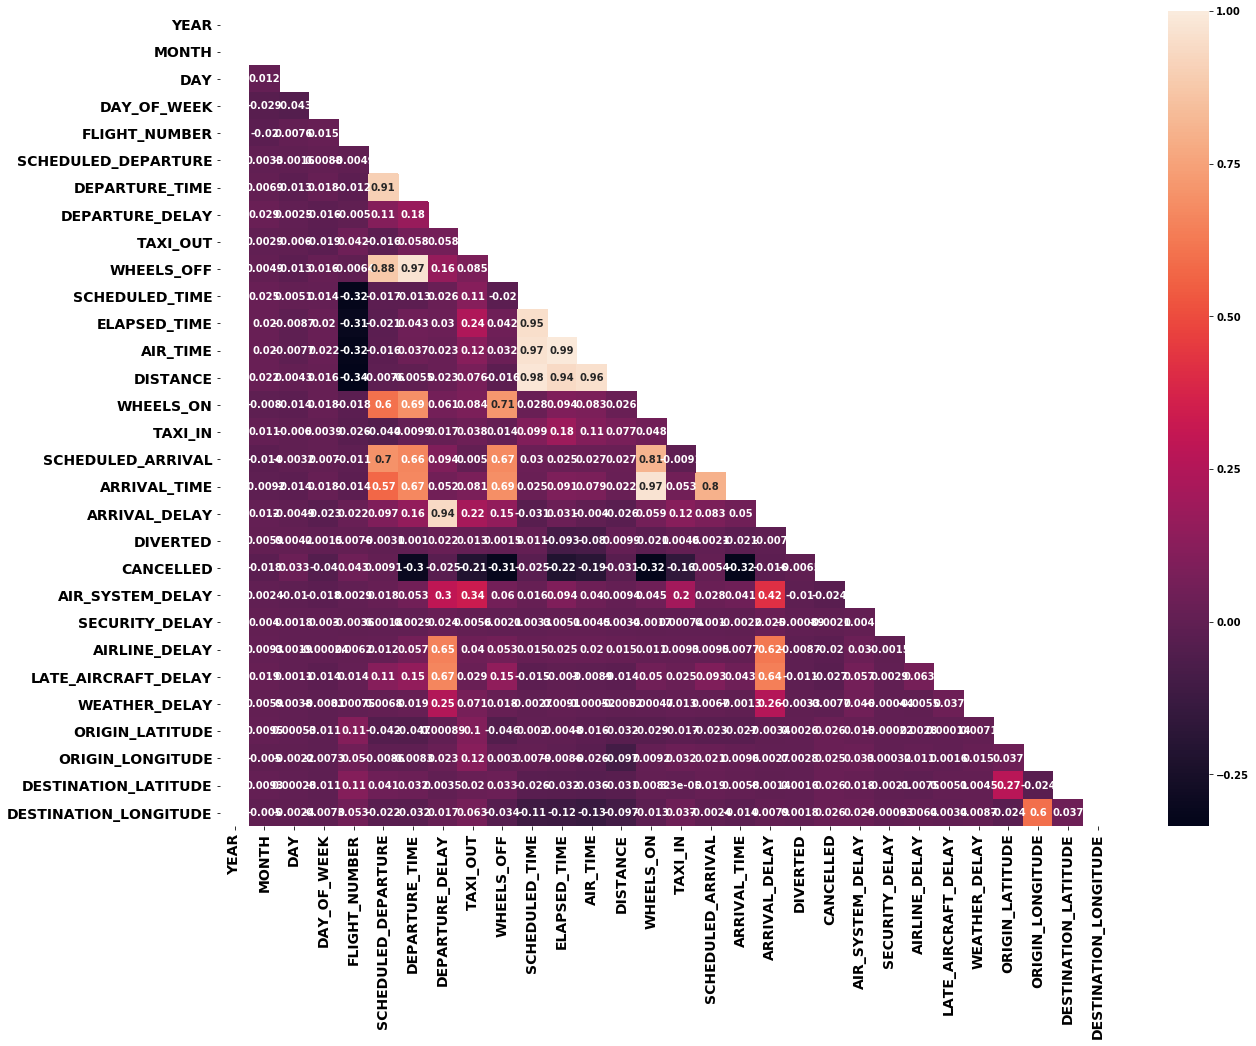

In [55]:
fix, ax = plt.subplots(figsize=(20,15))
mask = np.zeros_like(df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(df.corr(), annot=True, mask=mask, ax=ax)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14)
plt.savefig("./img/FlightsHeatMap.png")
plt.show()

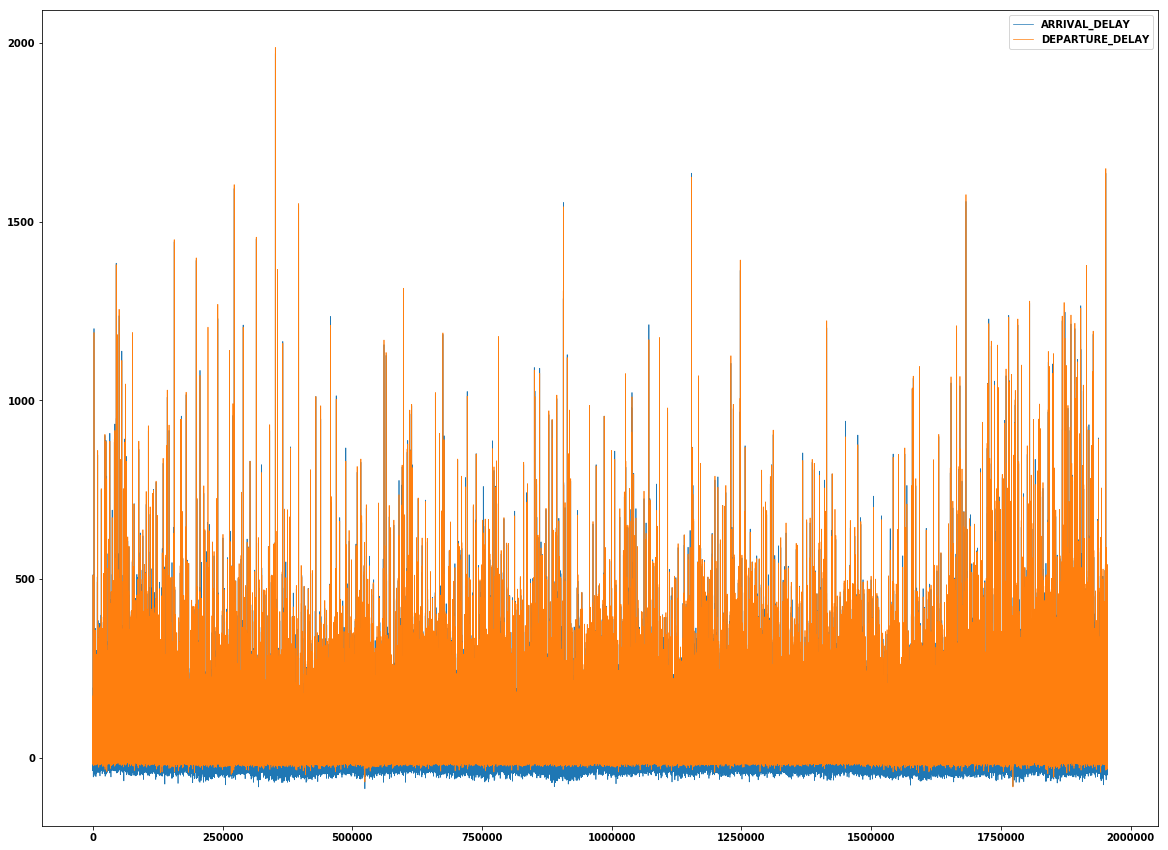

In [56]:
df_plt[['ARRIVAL_DELAY','DEPARTURE_DELAY']].plot(lw=.7,figsize=(20,15))
plt.savefig("./img/arrival_delay vs Departure Delay plot.png")

As can be seen from this graph that the departure delay is the most longest one whereas the arrival is the lowest

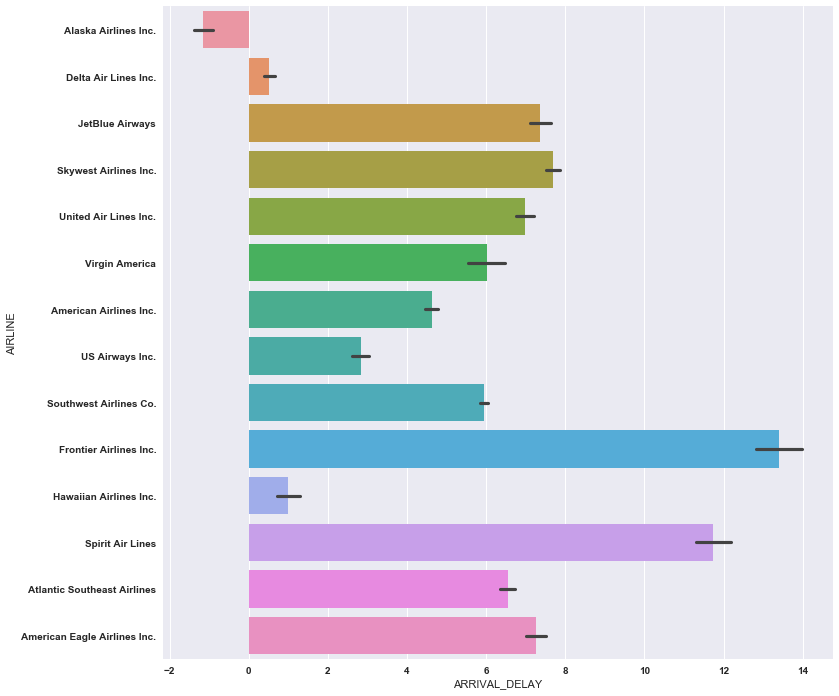

In [57]:
sns.set(rc={"figure.figsize": (12, 12)})
sns.barplot(x='ARRIVAL_DELAY',y='AIRLINE',data=df,saturation=0.75)
#plt.figure(figsize=(20,15))
plt.savefig("./img/arrival_delay_per_airline.png")
plt.show()

As well, there is huge difference here in arrival delay between Alaska Airlines and Frontier, Spirit airlines respectively and most of flights of Alaska Airlines are arriving earlier than the planned arrival time

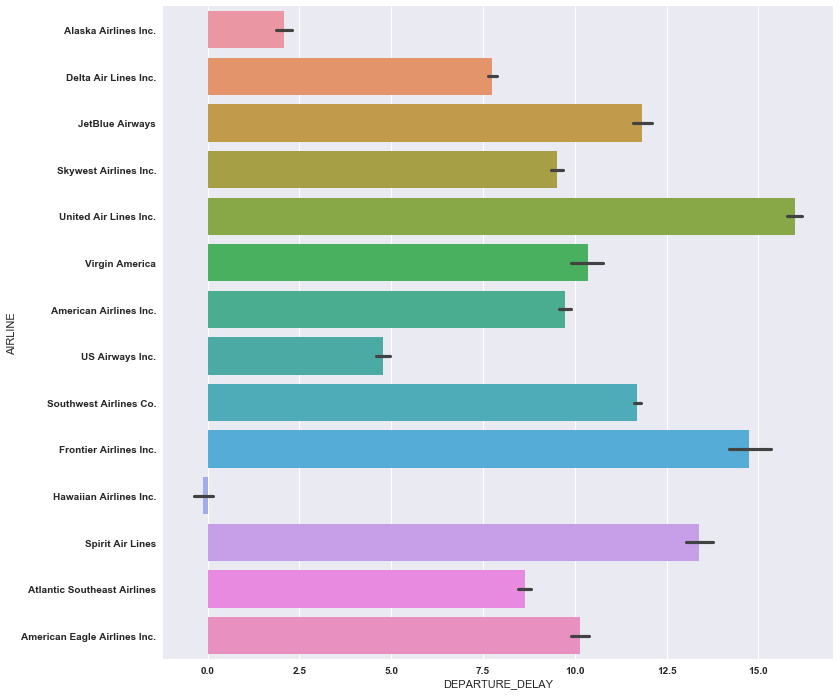

<Figure size 1440x1080 with 0 Axes>

In [58]:
sns.barplot(x='DEPARTURE_DELAY',y='AIRLINE',data=df,saturation=0.75)
plt.figure(figsize=(20,15))
plt.savefig("./img/departure_delay_per_airline.png")
plt.show()

As well,and as shown above in the barplot there is huge difference here in departure delay between Hawaiian Airlines and United airlines and most of flights of Alaska Airlines are departing  earlier than the planned departure time

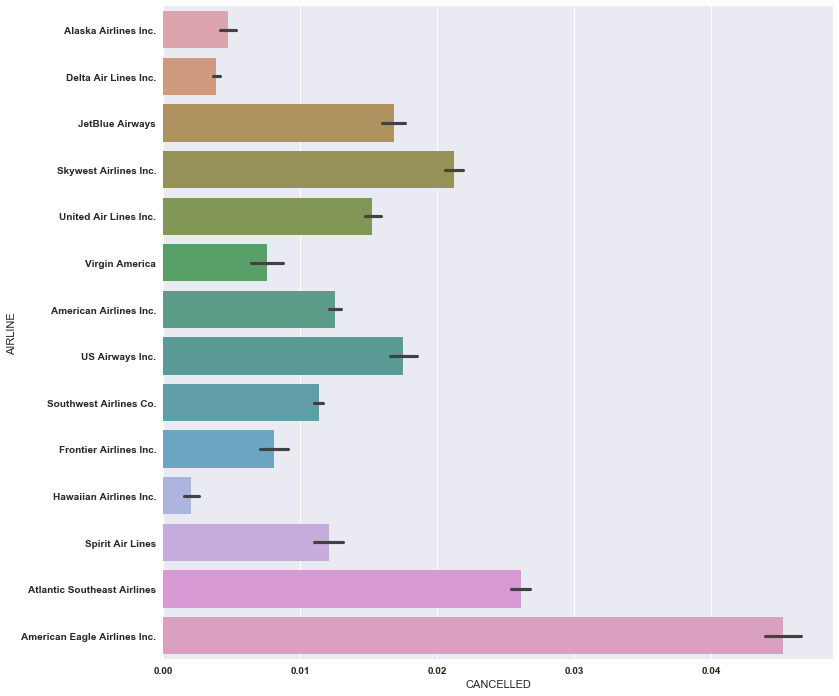

<Figure size 1440x1080 with 0 Axes>

In [59]:
sns.barplot(x='CANCELLED',y='AIRLINE',data=df,saturation=0.50)
plt.figure(figsize=(20,15))
plt.savefig("./img/cancellation_per_airline.png")
plt.show()

As can be seen from the above plot of the canceled flights per airline, we can see that the American eagle airlines are holding the big portion of the canceled flights and this needs to be investigated why most of their flights are canceled and some hyposises could be due to a weather conditions or occupancy

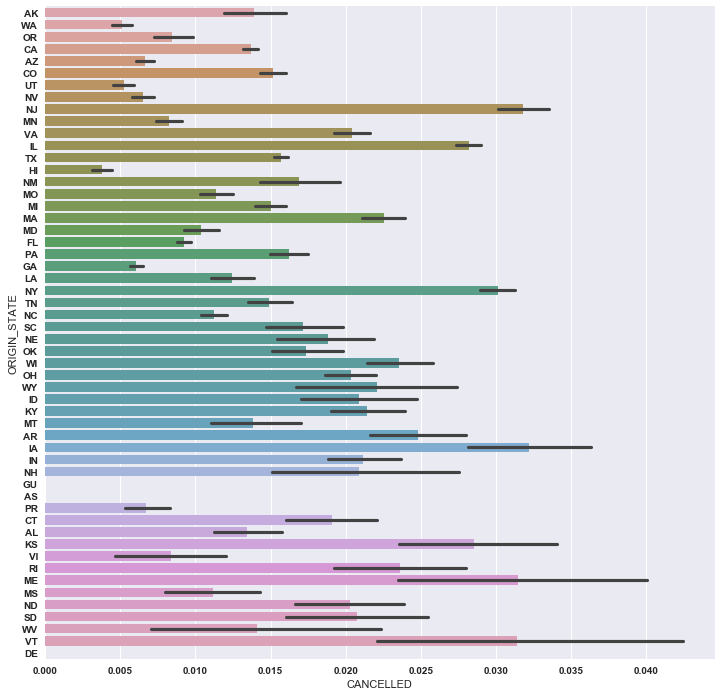

In [60]:
sns.set(rc={"figure.figsize": (12, 12)})
sns.barplot(x='CANCELLED',y='ORIGIN_STATE',data=df,saturation=0.50)
#plt.figure(figsize=(15,30))
plt.savefig("./img/cancellation_per_state.png")
plt.show()

It can be seen here from plotting the canceled flights we see that New Jersey has the largest canceled flights whereas Hawaii is the lowest in terms of canceled flights 

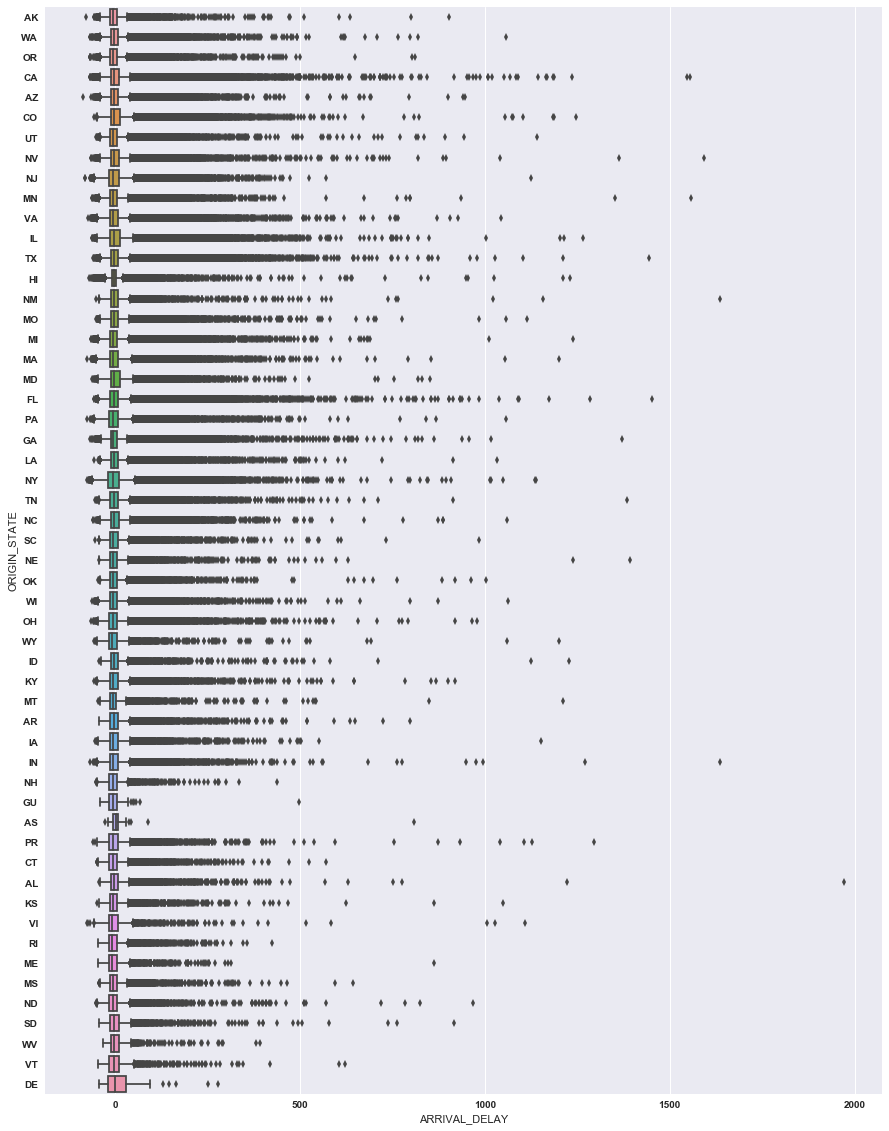

In [61]:
# Boxplot for the arrival delay in each city
fig, ax = plt.subplots(figsize=(15,20))
sns.boxplot(x='ARRIVAL_DELAY', y='ORIGIN_STATE', data=df, orient='h', ax=ax)
plt.savefig("arrival_delay_per_origin_state.png")
plt.show()

As can be seen here there is no much differences between all states in terms of mean arrival delay, we can see also some outliers in most of the states.

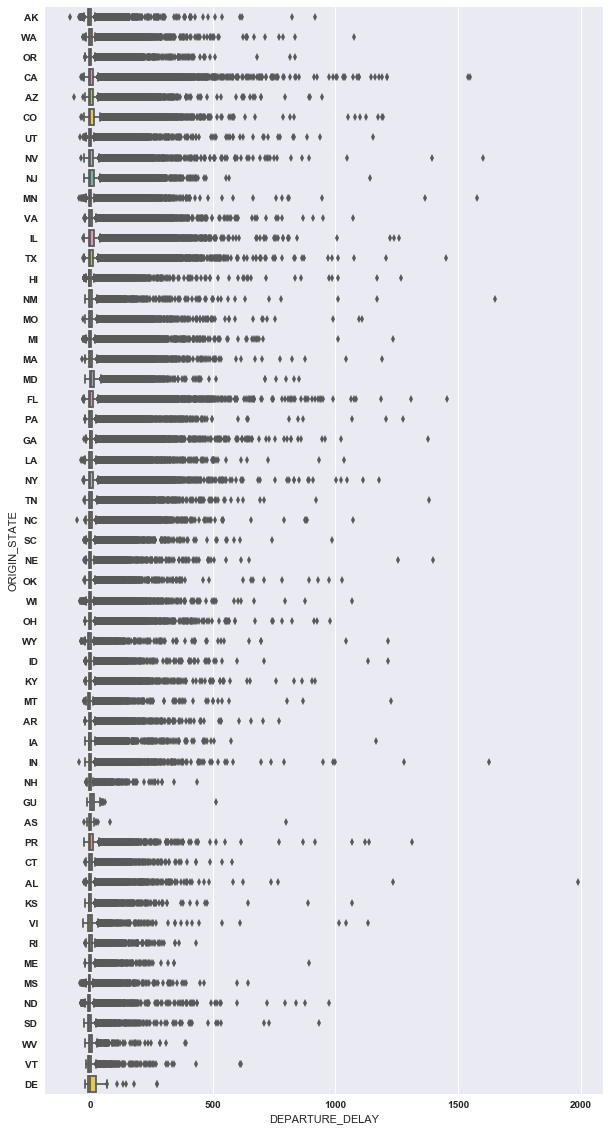

<Figure size 1440x1080 with 0 Axes>

In [62]:
# Boxplot for the departure delay in each city
fig, ax = plt.subplots(figsize=(10,20))
sns.boxplot(x='DEPARTURE_DELAY', y='ORIGIN_STATE', data=df, orient='h2', ax=ax,palette="Set2")
plt.figure(figsize=(20,15))
plt.savefig("./img/total_delay_per_origin_City.png")
plt.show()

As can be seen here there is no much differences between all states in terms of mean departure  delay, we can see also some outliers in most of the states.

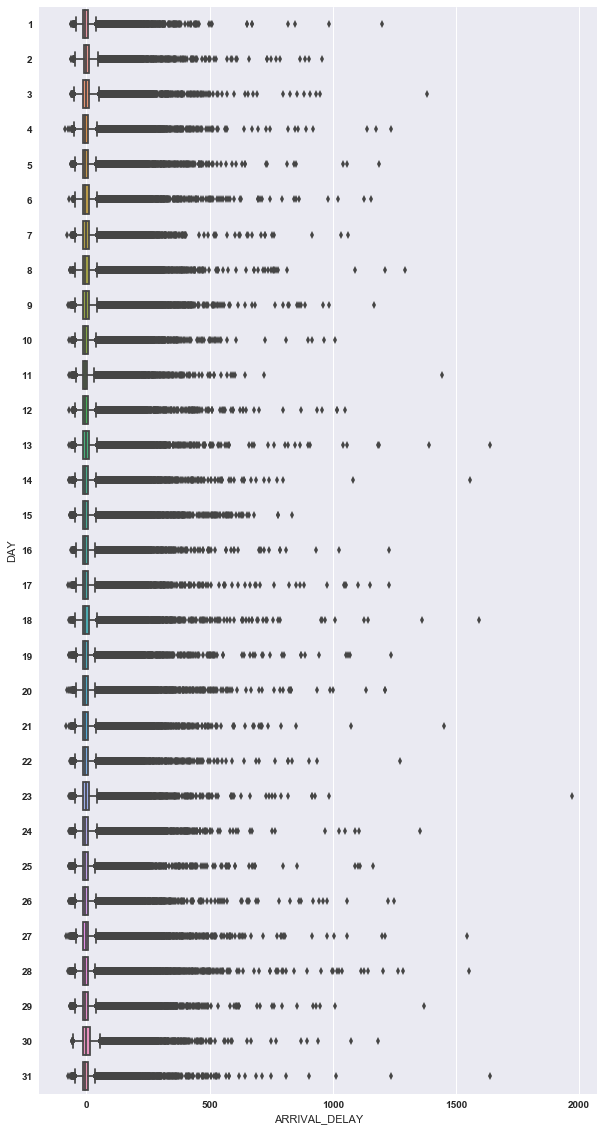

In [63]:
# Boxplot for the arrival delay in each city
fig, ax = plt.subplots(figsize=(10,20))
sns.boxplot(y='DAY', x='ARRIVAL_DELAY', data=df, orient='h', ax=ax)
plt.savefig("./img/arrival delay_per_day.png")
plt.show()

As can be seen here there is no much differences between all days of the month in terms of mean , we can see also some outliers in most of the days.

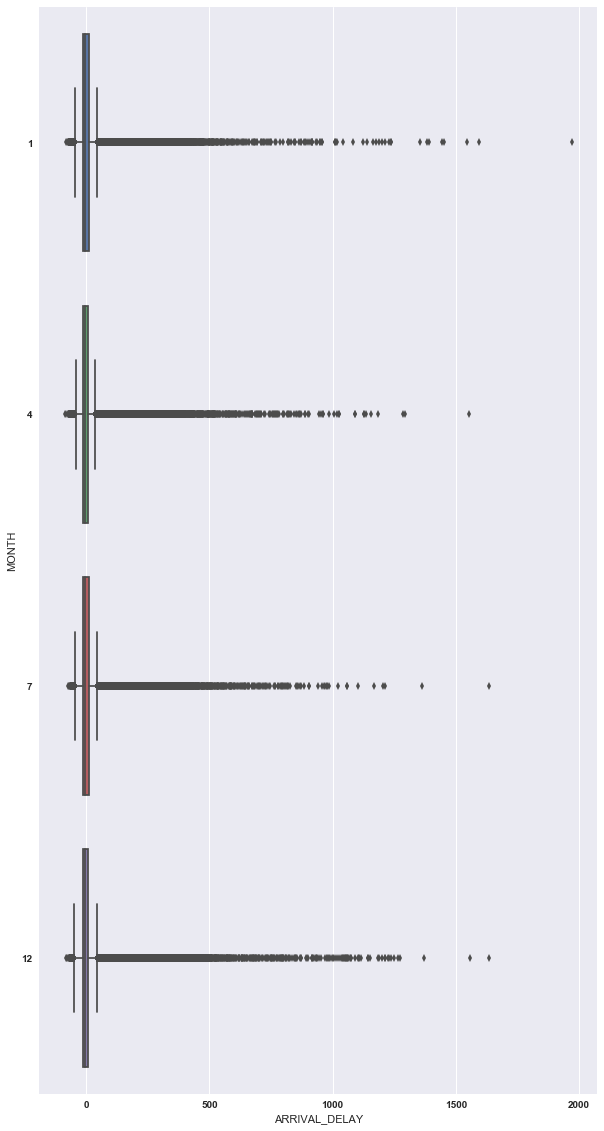

In [64]:
# Boxplot for the arrival delay in each city
fig, ax = plt.subplots(figsize=(10,20))
sns.boxplot(y='MONTH', x='ARRIVAL_DELAY', data=df, orient='h', ax=ax)
plt.savefig("./img/arrival delay_per_month.png")
plt.show()

There no much differences between our selected months (Jan, Mar, Jul, and Dec), and we still see some outliers in all of these months

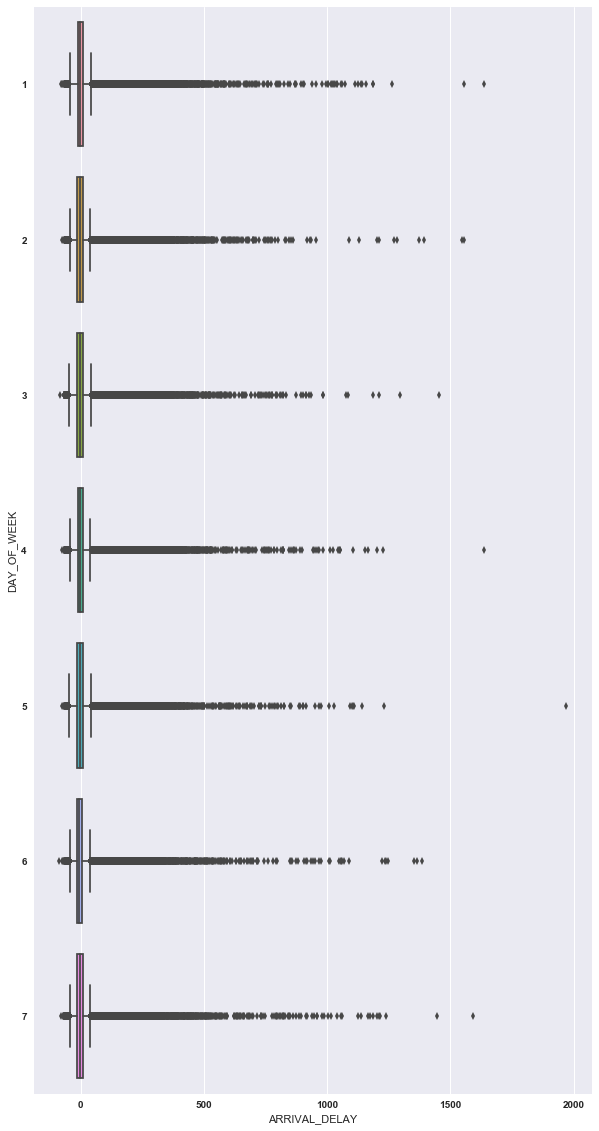

In [65]:
# Boxplot for the arrival delay in each city
fig, ax = plt.subplots(figsize=(10,20))
sns.boxplot(y='DAY_OF_WEEK', x='ARRIVAL_DELAY', data=df, orient='h', ax=ax)
plt.savefig("./img/arrival delay_per_day_of_week.png")
plt.show()

As can be seen here there is no much differences between all days of the week in terms of mean arrival delay, we can see also some outliers in most of the days

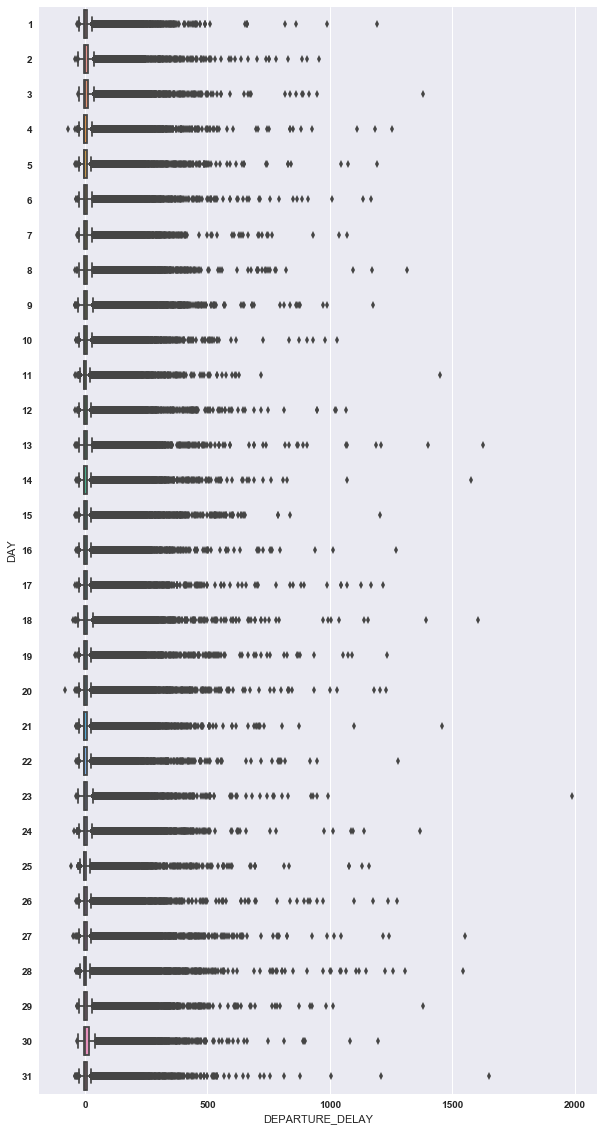

In [66]:
# Boxplot for the arrival delay in each city
fig, ax = plt.subplots(figsize=(10,20))
sns.boxplot(y='DAY', x='DEPARTURE_DELAY', data=df, orient='h', ax=ax)
plt.savefig("./img/departure delay_per_day.png")
plt.show()

As can be seen here there is no much differences between all days of the month in terms of mean departure delay , we can see also some outliers in most of the days.

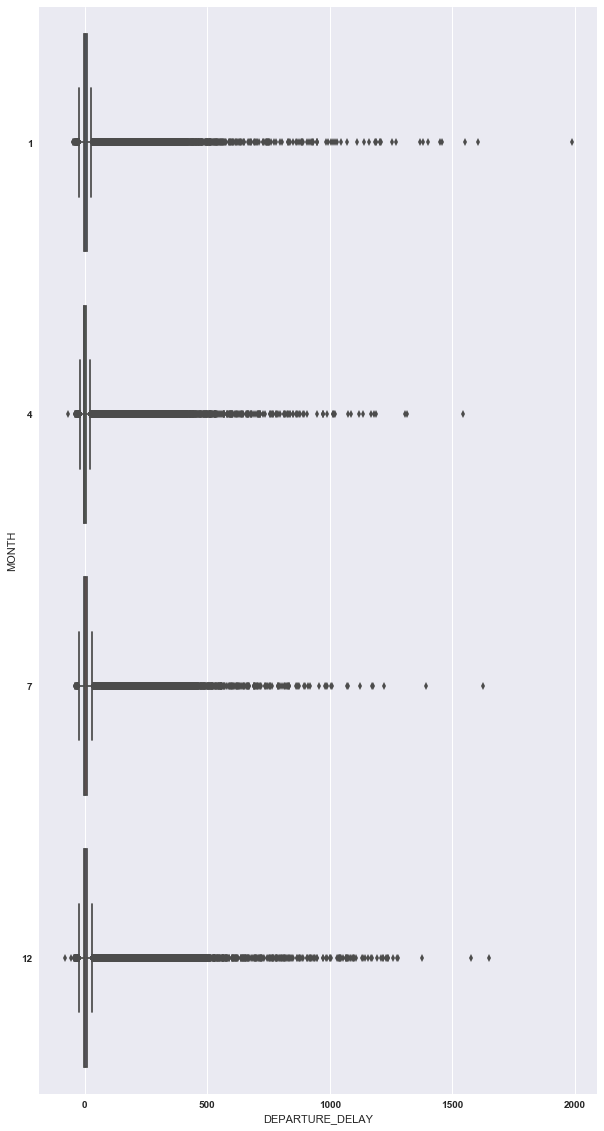

In [67]:
# Boxplot for the arrival delay in each city
fig, ax = plt.subplots(figsize=(10,20))
sns.boxplot(y='MONTH', x='DEPARTURE_DELAY', data=df, orient='h', ax=ax)
plt.savefig("./img/departure delay_per_month.png")
plt.show()

There no much differences between our selected months (Jan, Mar, Jul, and Dec), and we still see some outliers in all of these months

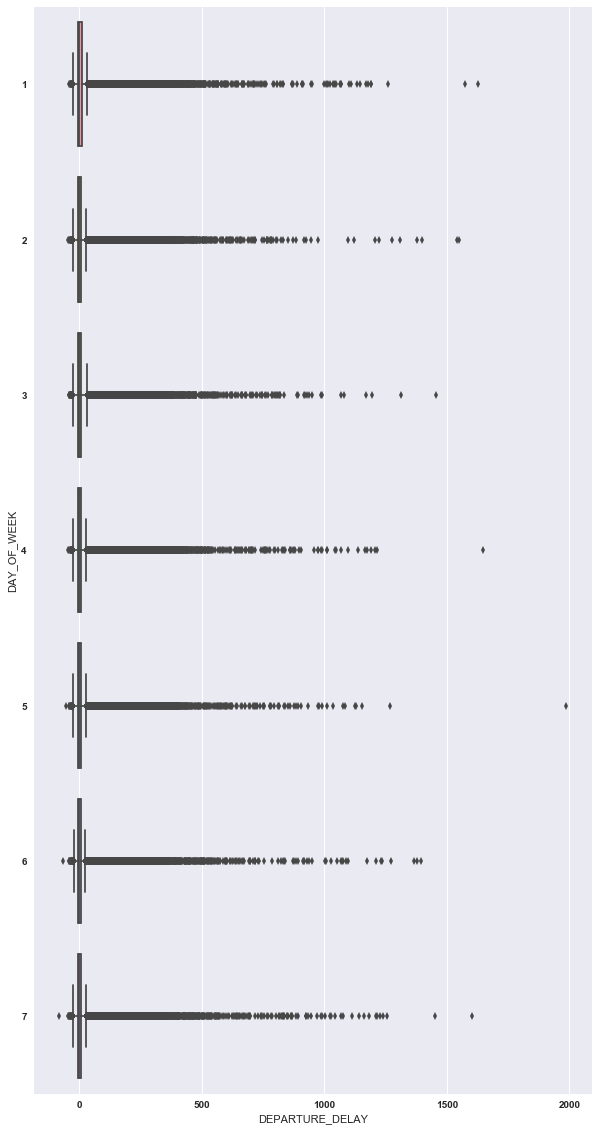

In [68]:
# Boxplot for the arrival delay in each city
fig, ax = plt.subplots(figsize=(10,20))
sns.boxplot(y='DAY_OF_WEEK', x='DEPARTURE_DELAY', data=df, orient='h', ax=ax)
plt.savefig("./img/departure delay_per_day_of_week.png")
plt.show()

As can be seen here there is no much differences between all days of the week in terms of mean departure delay, we can see also some outliers in most of the days

<img src="./Tableau/Orlando-Others Arrival Delay.png">

This plot shows all average arrival delays between Orlando and other US cities and as can be seen it varies between -5.86 and 47.94 minutes in max.

<img src="./Tableau/Orlando-Others Departure Delay.png">

This plot shows all average Departure delays between Orlando and other US cities and as can be seen it varies between -0.13 and 42.97 minutes in max. which is slightly lower the the arrival delay on Orlando.

<img src="./Tableau/Boston-Others Arrival Delay.png">

This plot shows all average Departure delays between Boston and other US cities and as can be seen it varies between -14.03 and 22.30 minutes in max. which is significantly lower the the arrival delay on Orlando.

<img src="./Tableau/Boston-Others Departure Delay.png">

This plot shows all average Departure delays between Orlando and other US cities and as can be seen it varies between 1.11 and 26.83 minutes in max. which is slightly higher the the arrival delay on Boston.

<img src="./Tableau/Seatle-Others Arrival Delay .png">

This plot shows all average Departure delays between Seatle and other US cities and as can be seen it varies between -18.19 and 19.25 minutes in max.

<img src="./Tableau/Seatle-Others Departure Delay.png">

This plot shows all average Departure delays between Seatle and other US cities and as can be seen it varies between 0.00 and 21.44 minutes in max. which is slightly higher than the arrival delay on Seatle.

<img src="./Tableau/JFK-Others Arrival Delay.png">

This plot shows all average Departure delays between New york -JFK and other US cities and as can be seen it varies between -8.25 and 38.01 minutes in max.

<img src="./Tableau/JFK-Others Departure Delay .png">

This plot shows all average Departure delays between New York and other US cities and as can be seen it varies between -0.91 and 46.98 minutes in max. which is slightly higher than the arrival delay on New York.

<img src="./Tableau/Atlanta-Others Arrival Delay.png">

This plot shows all average arrival delays between Atlanta and other US cities and as can be seen it varies between -14.33 and 63.85 minutes in max.

<img src="./Tableau/Atlanta-Others Departure Delay.png">

This plot shows all average Departure delays between Atlanta and other US cities and as can be seen it varies between 0.00 and 21.44 minutes in max. which is significantly higher than the arrival delay on Atlanta by almost more than 5 times which needs for sure to be invistigated and see why all this delay?????

<img src="./Tableau/Anchorage- Others Arrival Delay.png">

This plot shows all average arrival delays between Anchorage and other US cities and as can be seen it varies between -32.11 and 28.05 minutes in max.

<img src="./Tableau/Anchorage- Others Departure Delay.png">

This plot shows all average Departure delays between Anchorage and other US cities and as can be seen it varies between -5.53 and 42.61 minutes in max. which is higher than the arrival delay on Anchorage.

<img src="./Tableau/Average of Arrival Delay for each Airline.png">

<img src="./Tableau/Buttom20_Average of Departure Delay at each route.png">

<img src="./Tableau/Top20_Average of Departure Delay at each route.png">

<img src="./Tableau/Buttom20_Average of Arrival Delay at each route.png">

<img src="./Tableau/Top20_Average of Arrival Delay at each route.png">

<img src="./Tableau/Top10_Average of Arrival Delay for each State.png">

<img src="./Tableau/Buttom10_Average of Arrival Delay for each State.png">

<img src="./Tableau/Average of Arrival Delay and average of Departure Delay for each Airline.png">

<img src="./Tableau/Top20_Average of Arrival Delay at each Airport.png">

<img src="./Tableau/Buttom20_Average of Arrival Delay at each Airport.png">

<img src="./Tableau/Average of Departure Delay for each Airline..png">

<img src="./Tableau/Average of Arrival Delay and average of Departure Delay for each Airline.png">

<img src="./Tableau/Average of Arrival Delay and average of Departure Delay for each AirlineState.png">

<img src="./Tableau/Number of Flights per City - American Airline.png">

<img src="./Tableau/Number of Flights per City - Alaska Airlines.png">

<img src="./Tableau/Number of Flights per City - Delta Airlines.png">

<img src="./Tableau/Average Arrival Delay per Route.png">

<img src="./Tableau/Average Departure Delay per Route.png">

Surprisingly, LAX-SFO is the most delayed route in summation and something really wrong in this route and we shall discuss this case later

<font color='Black' size=5>2.4 Creating new features and removing outliers</font>
<br>

In this section and based on the above graphs i'm going to create the following columns that have seems to having significant impact and looks like a good predictors ; to start our models prediction and I'm going to  check deeply for the good features that could be useful in our model.

based on our graphs it can be seen that the LAX-SFO and SFO-LAX route is mostly delayed one on average which deserve to be taken into consideration to see exactly why this is happening 

In [69]:
df['IS_LAX-SFO_ROUTE']=df['ROUTE'].map(lambda x: 1 if x=='LAX-SFO' else 0)

In [70]:
df['IS_SFO-LAX_ROUTE']=df['ROUTE'].map(lambda x: 1 if x=='SFO-LAX' else 0)

In [71]:
df['IS_SFO-LAX_ROUTE'].value_counts()

0    1950098
1       4969
Name: IS_SFO-LAX_ROUTE, dtype: int64

As well, MT,UT states shown to be having lowest arrival delay in the states

In [72]:
df['IS_MT_ORIGIN_STATE']=df['ORIGIN_STATE'].map(lambda x: 1 if x=='MT' else 0)

In [73]:
df['IS_UT_ORIGIN_STATE']=df['ORIGIN_STATE'].map(lambda x: 1 if x=='UT' else 0)

Also, Skywest airlines is the most delayed airline and could be of good idea to see what's happening in this airlines as well

In [74]:
df['IS_NK_AIRLINE']=df['IATA_AIRLINE_CODE'].map(lambda x: 1 if x=='NK' else 0)

In [75]:
df['IS_NK_AIRLINE'].value_counts()

0    1915806
1      39261
Name: IS_NK_AIRLINE, dtype: int64

Furthermore, it can be seen that ILM - wilmington airport- airports is mostly delayable with significant amount of average delay whereas all flights of CNY -Canyonfields- are always arriving earlier than the planned arrival time 

In [76]:
df['IS_ILM_AIRPORT']=df['IATA_ORIGIN_AIRPORT_CODE'].map(lambda x: 1 if x=='ILM' else 0)

In [77]:
df['IS_CNY_AIRPORT']=df['IATA_ORIGIN_AIRPORT_CODE'].map(lambda x: 1 if x=='CNY' else 0)

examining morning and night flights could be helpful for our modeling and for that i'm going to consider all flights before 10:00 AM as morning flights and all flights after 06:00 PM as night flights and all flights between would be noon and afternoon flights

In [78]:
df['IS_MORNING_FLIGHT']=df['DEPARTURE_TIME'].map(lambda x: 1 if x<1000 else 0)

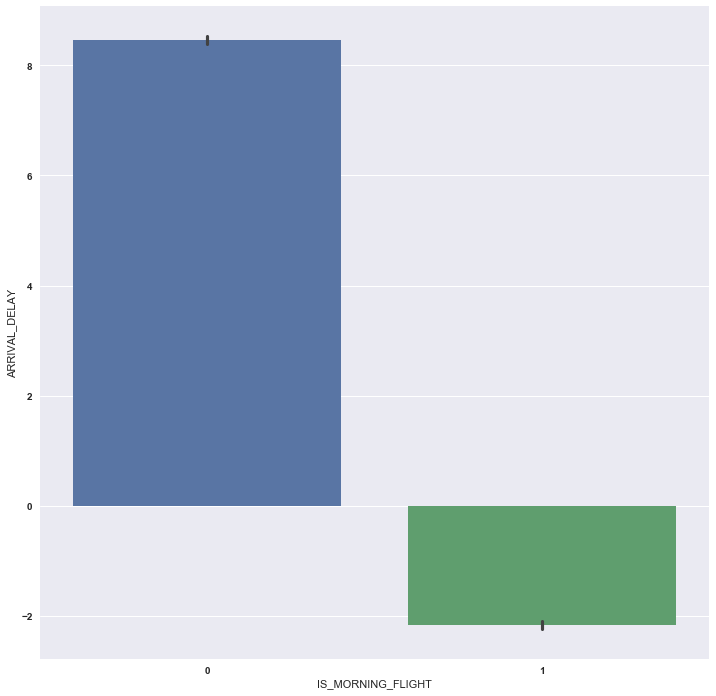

In [79]:
sns.barplot(y='ARRIVAL_DELAY',x='IS_MORNING_FLIGHT',data=df,saturation=0.75)
plt.savefig("./img/arrival_delay_for morning flights.csv.png")
plt.show()

so from the above graph  we can see on average most of the flights are arriving earlier than the expected time which is something needs to be taken into consideration to choose the flights that are leaving in the morning other than flights leaving at night

In [80]:
df['IS_NIGHT_FLIGHT']=df['DEPARTURE_TIME'].map(lambda x: 1 if x>1800 else 0)

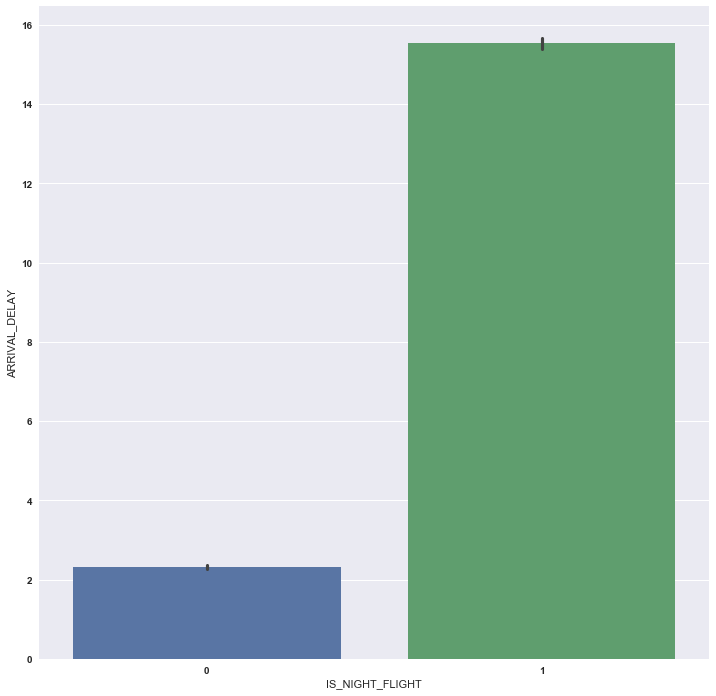

In [81]:
sns.barplot(y='ARRIVAL_DELAY',x='IS_NIGHT_FLIGHT',data=df,saturation=0.75)
plt.savefig("./img/arrival_delay_for night flights.csv.png")
plt.show()

so from the above graph  we can see on average most of the flights are arriving later than the expected time which is something needs to be taken into consideration when traveling at night

In [82]:
df.IS_NIGHT_FLIGHT.value_counts()

0    1515324
1     439743
Name: IS_NIGHT_FLIGHT, dtype: int64

In [83]:
df.IS_MORNING_FLIGHT.value_counts()

0    1371877
1     583190
Name: IS_MORNING_FLIGHT, dtype: int64

In [84]:
df.groupby('ORIGIN_AIRPORT')['DEPARTURE_DELAY'].mean().sort_values().describe()

count    322.000000
mean       7.774851
std        4.779594
min       -7.049587
25%        5.186111
50%        7.650268
75%       10.088764
max       33.129032
Name: DEPARTURE_DELAY, dtype: float64

In [85]:
df.groupby('ORIGIN_AIRPORT')['DEPARTURE_DELAY'].mean().sort_values().tail()

ORIGIN_AIRPORT
Del Norte County Airport (Jack McNamara Field)    23.444444
Martha's Vineyard Airport                         23.758065
Wilmington Airport                                24.784314
Gustavus Airport                                  25.258065
Barnstable Municipal Airport                      33.129032
Name: DEPARTURE_DELAY, dtype: float64

In [86]:
df.groupby('ORIGIN_AIRPORT')['DEPARTURE_DELAY'].mean().sort_values().head()

ORIGIN_AIRPORT
Yakutat Airport                     -7.049587
Canyonlands Field                   -6.733333
Merle K. (Mudhole) Smith Airport    -6.557851
Elko Regional Airport               -4.351111
Lewiston-Nez Perce County Airport   -2.638009
Name: DEPARTURE_DELAY, dtype: float64

let's save our dataframe now to help us having an updated dataset with new features

In [87]:
df.to_csv('../../../../../sources/2015Flights.csv',index=False)

now let's remove some of the outliers and here I'm going to remove some outliers from the arrival delay and let's see forst all delays below 180 min inside our data frame df

In [88]:
percentileofscore(df.ARRIVAL_DELAY,180)

99.13821367758752

Now, and since we have some outliers and i'll with assumption to consider all delays above 180 min as outliers and as well since the cancelled flights is considered as outliers as well i'm going to remove all cancelled flights.

In [89]:
mask=df.ARRIVAL_DELAY<180
df=df[mask]

Also as can be seen that the cancelled flight has to be removed as these values has no meaning for our model which is predicting an actual flights and not the cancelled ones

In [90]:
mask= df['CANCELLED']==0
df=df[mask]

<font color='Black' size=6>3. Modeling </font>
<br>


<font color='Black' size=5>3.1 Arrival Delay Prediction</font>
<br>

In this section I'm going to predict the arrival delay let's start our modeling by using the airline,Month,day,dayofweek,distance,diverted and the newly created features as predictors and arrival delay as a target.

But first let's see our baseline for the arrival delay

In [91]:
print(f'ARRIVAL_DELAY baseline is: {df.ARRIVAL_DELAY.mean():.2f}')

ARRIVAL_DELAY baseline is: 3.01


In [92]:
cols = ['MONTH', 'DAY', 'DAY_OF_WEEK', 'DISTANCE', 'DIVERTED','AIRLINE',
        'IS_LAX-SFO_ROUTE', 'IS_SFO-LAX_ROUTE', 'IS_MT_ORIGIN_STATE', 'IS_UT_ORIGIN_STATE',
        'IS_NK_AIRLINE', 'IS_ILM_AIRPORT', 'IS_CNY_AIRPORT', 'IS_NIGHT_FLIGHT',
        'IS_MORNING_FLIGHT']

In [93]:
y=df['ARRIVAL_DELAY']

In [94]:
X=df[cols]

Now, let's dummyfiying  our predicted matrix

In [95]:
X=pd.get_dummies(X,drop_first=True)

In [96]:
y.shape,X.shape

((1908716,), (1908716, 27))

now let's creating our train/test datasets

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [98]:
y_test.describe()

count    572615.000000
mean          3.031747
std          29.109768
min         -87.000000
25%         -13.000000
50%          -4.000000
75%           8.000000
max         179.000000
Name: ARRIVAL_DELAY, dtype: float64

<font color='Black' size=4>3.1.1 predicting arrival delay using linear regression</font>
<br>

I'm going here to use the linear regression with pipelining it with Standard scalar

In [99]:
model = Pipeline(steps=[('ss',StandardScaler()),
                         ('linreg',LinearRegression())])

In [100]:
model.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linreg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [101]:
predictions  =  model.predict(X_test)
score        =  model.score(X_test, y_test)

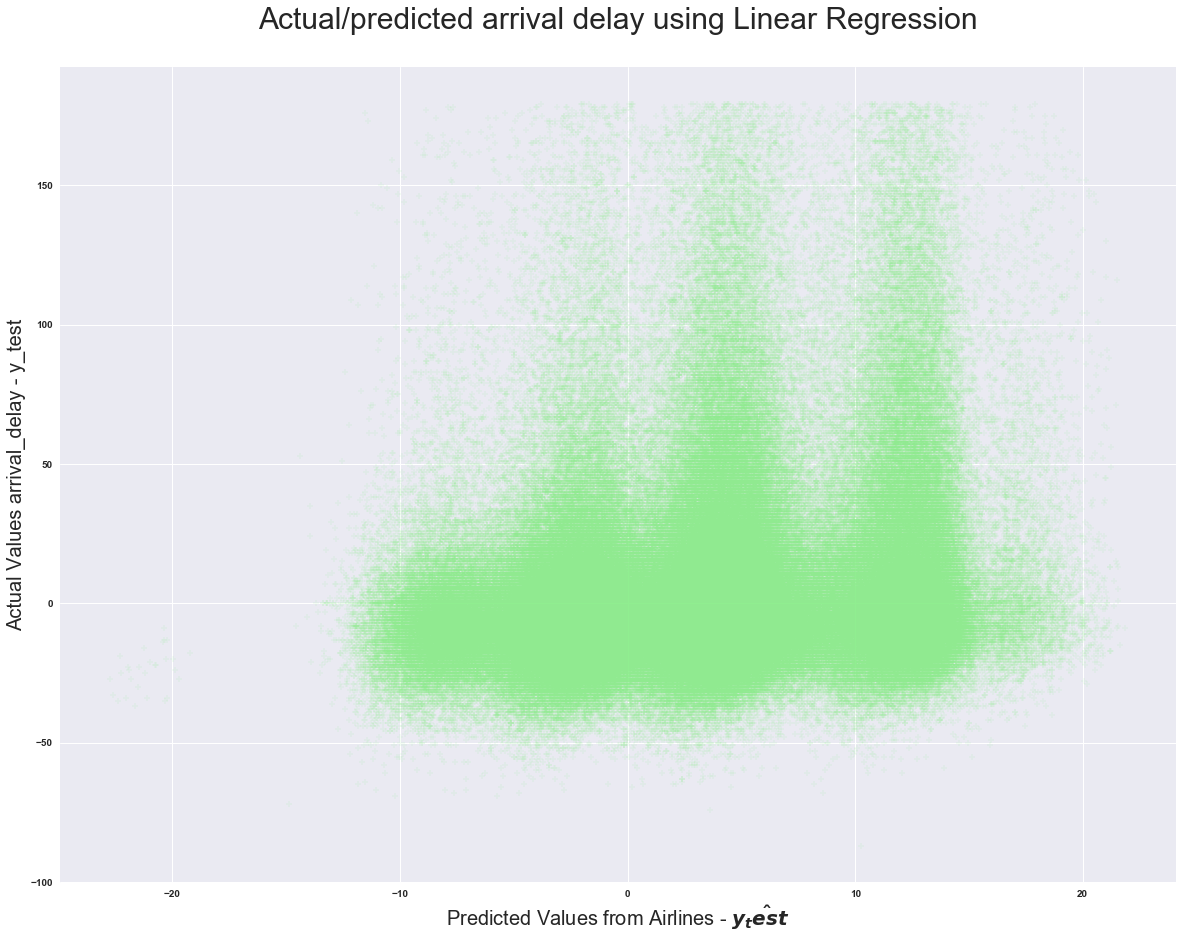

score:  0.04


In [102]:
# Plot the model
plt.figure(figsize=(20,15))
plt.scatter(predictions, y_test, s=30, c='lightgreen', marker='+', zorder=90, alpha=0.1)
plt.xlabel("Predicted Values from Airlines - $\hat{y_test}$", fontsize=20)
plt.ylabel("Actual Values arrival_delay - y_test",fontsize=20)
plt.title('Actual/predicted arrival delay using Linear Regression\n', fontsize=30)
plt.savefig("./img/Arrival_Delay_linear_regression.png")
plt.show()

print ("score: ", np.round(score,decimals=2))

we can see that our score (0.04) is still fair as it is above our baseline (3.01) here and we need to try to enhance it to have a good model and let's try to see other regression models.

Also, a quick takeaway we can get here that our linear model don't predict much more than 23 minutes which is not good for our model and need to be investigated  to see if there are some other outliers affecting our model.

<font color='Black' size=4>3.1.2 predicting arrival delay using Random Forest regression</font>
<br>

I'm going here to use the linear regression with pipelining it with Standard scalar
Using Random Forest Regression


In [103]:
model = RandomForestRegressor(max_depth=20, n_estimators=30, random_state=0)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [104]:
predictions=model.predict(X_test)
score=model.score(X_test,y_test)

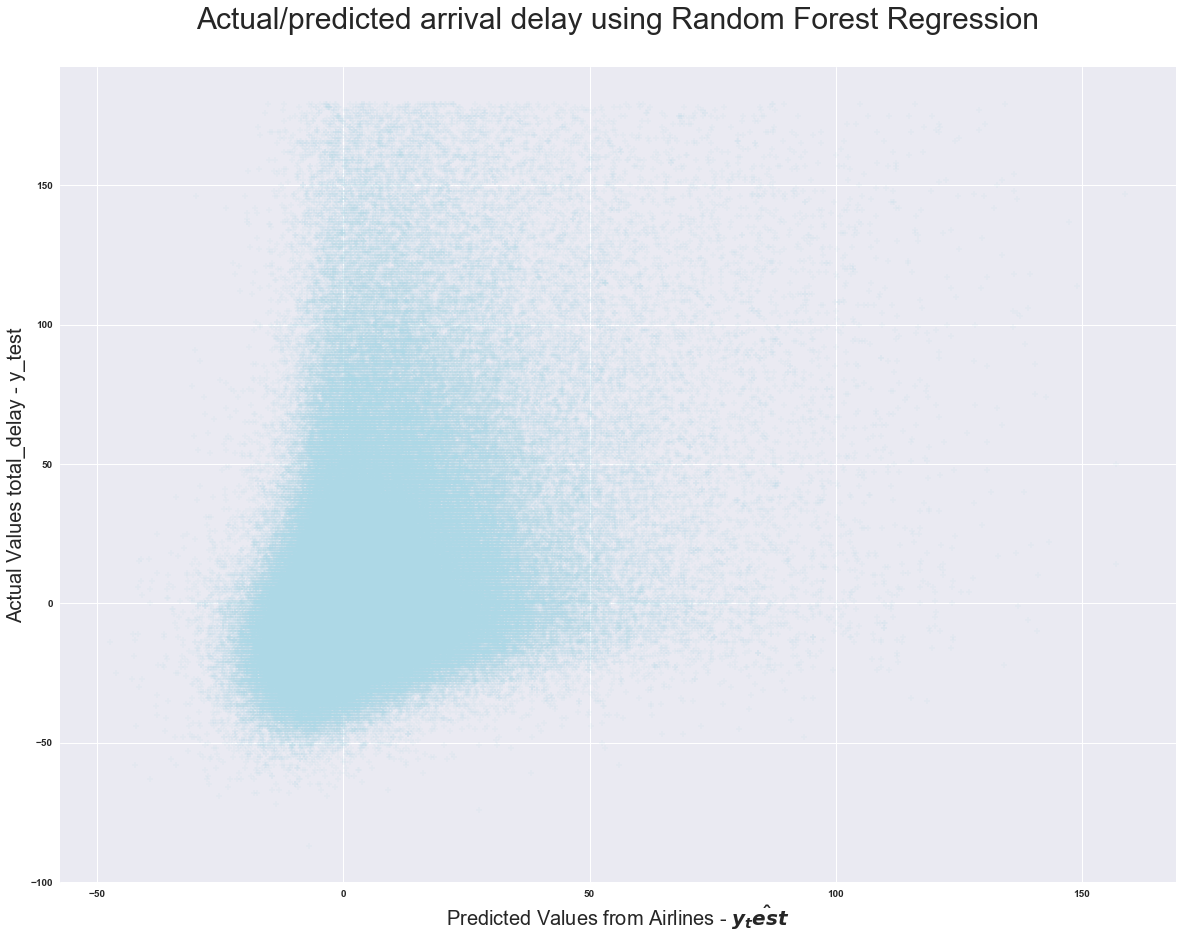

score:  0.14


In [105]:
# Plot the model
plt.figure(figsize=(20,15))
plt.scatter(predictions, y_test, s=30, c='lightblue', marker='+', zorder=90, alpha=0.1)
plt.xlabel("Predicted Values from Airlines - $\hat{y_test}$", fontsize=20)
plt.ylabel("Actual Values total_delay - y_test", fontsize=20)
plt.title('Actual/predicted arrival delay using Random Forest Regression\n', fontsize=30)
plt.savefig("./img/Arrival_Delay_RF_regression.png")
plt.show()

print ("score: ", np.round(score,decimals=2))

Our Random Forest model here is performing better than the linear model and we've got score of 0.14 which is great in comparison with the LR.
as well our model is predicting almost till 150 which is better then LR

In [106]:
print(model.feature_importances_)

[7.74451061e-02 1.54974322e-01 7.90177530e-02 4.87719208e-01
 1.43787713e-03 3.07638530e-03 2.96999421e-03 1.23516010e-03
 8.61397271e-03 3.22203613e-03 2.07579032e-04 4.78578781e-05
 6.42733510e-02 2.47649972e-02 8.80584877e-03 1.17765430e-02
 4.92542516e-03 1.40646367e-02 4.54525971e-03 2.02983191e-03
 1.02554081e-02 7.00367694e-03 6.98955892e-03 2.50504223e-03
 3.44421230e-03 1.02086370e-02 4.44032020e-03]


<font color='Black' size=4>3.1.3 predicting arrival delay using KNN regression</font>
<br>

I'm going here to use the KNN regression with pipelining it with Standard scalar
Using Random Forest Regression

In [107]:
model = KNeighborsRegressor(n_neighbors=10)
model.fit(X_train, y_train) 

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')

In [108]:
predictions=model.predict(X_test)
score=model.score(X_test,y_test)

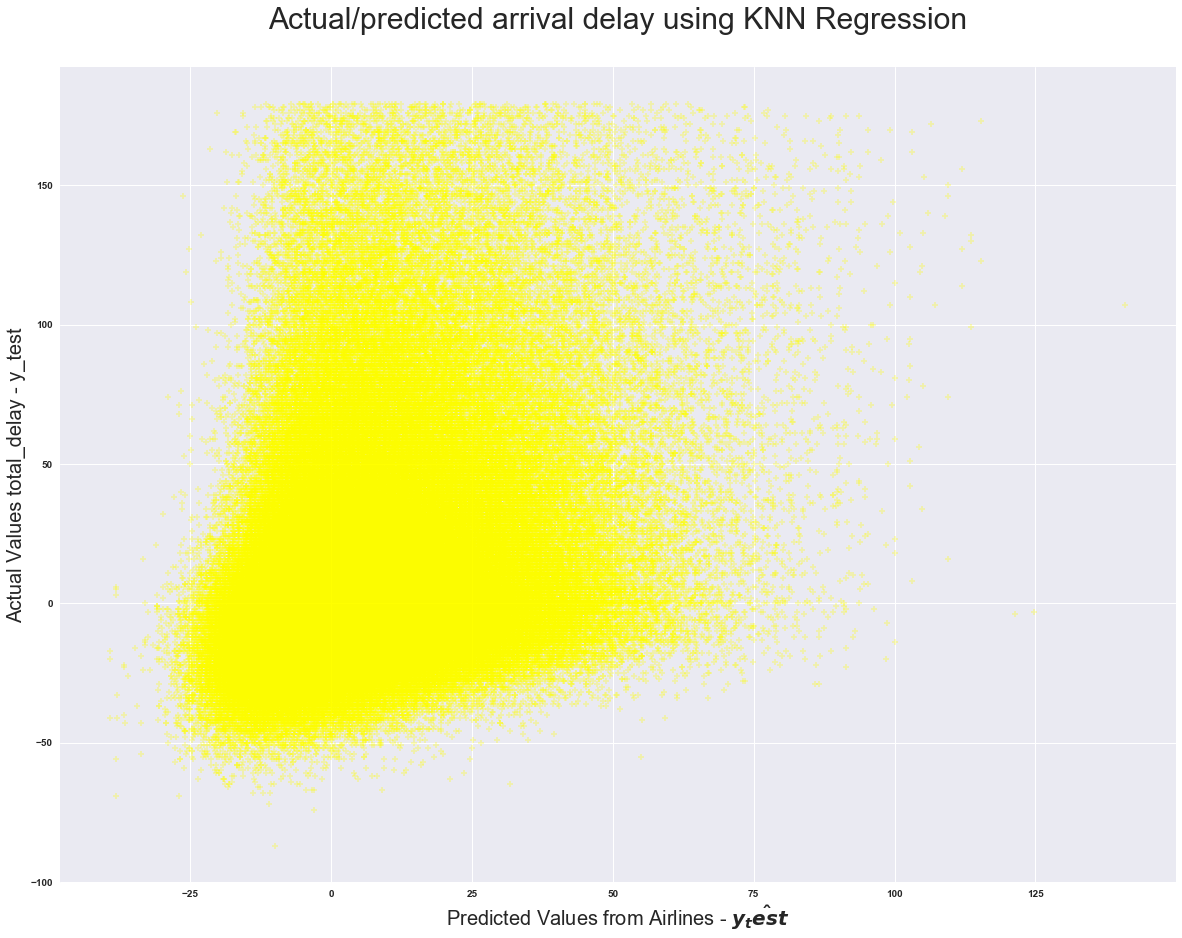

score:  0.12


In [109]:
# Plot the model
plt.figure(figsize=(20,15))
plt.scatter(predictions, y_test, s=30, c='yellow', marker='+', zorder=90,alpha=0.3)
plt.xlabel("Predicted Values from Airlines - $\hat{y_test}$", fontsize=20)
plt.ylabel("Actual Values total_delay - y_test", fontsize=20)
plt.title('Actual/predicted arrival delay using KNN Regression\n', fontsize=30)
plt.savefig("./img/Arrival_Delay_KNN_regression.png")
plt.show()

print ("score: ", np.round(score,decimals=2))

Our KNN model here is performing better than the linear model but not good as the Ranmdom Forest model and we've got score of 0.12 which is great in comparison with the LR.
as well our model is predicting almost till 125 minutes which is better then LR

<font color='Black' size=4>3.1.4 predicting arrival delay using Random ADA Boost regression</font>
<br>

I'm going here to use the ADA Boost regression with pipelining it with Standard scalar
Using ADA Boost Regression

In [110]:
#param_dist = {
# 'learning_rate' : [0.01,0.05] #0.1,0.3,1]
# #'loss' : ['linear', 'square', 'exponential']
# }

#pre_gs_inst = GridSearchCV(AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=2),
#                                                    n_estimators=100),
# param_dist,
# cv=3,
# n_jobs=-1,
# verbose=1
#                          )

#pre_gs_inst.fit(X_train, y_train)

In [111]:
abr = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=2),
                                                    n_estimators=100)

abr.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=100,
         random_state=None)

In [112]:
predictions=abr.predict(X_test)
score=abr.score(X_test,y_test)

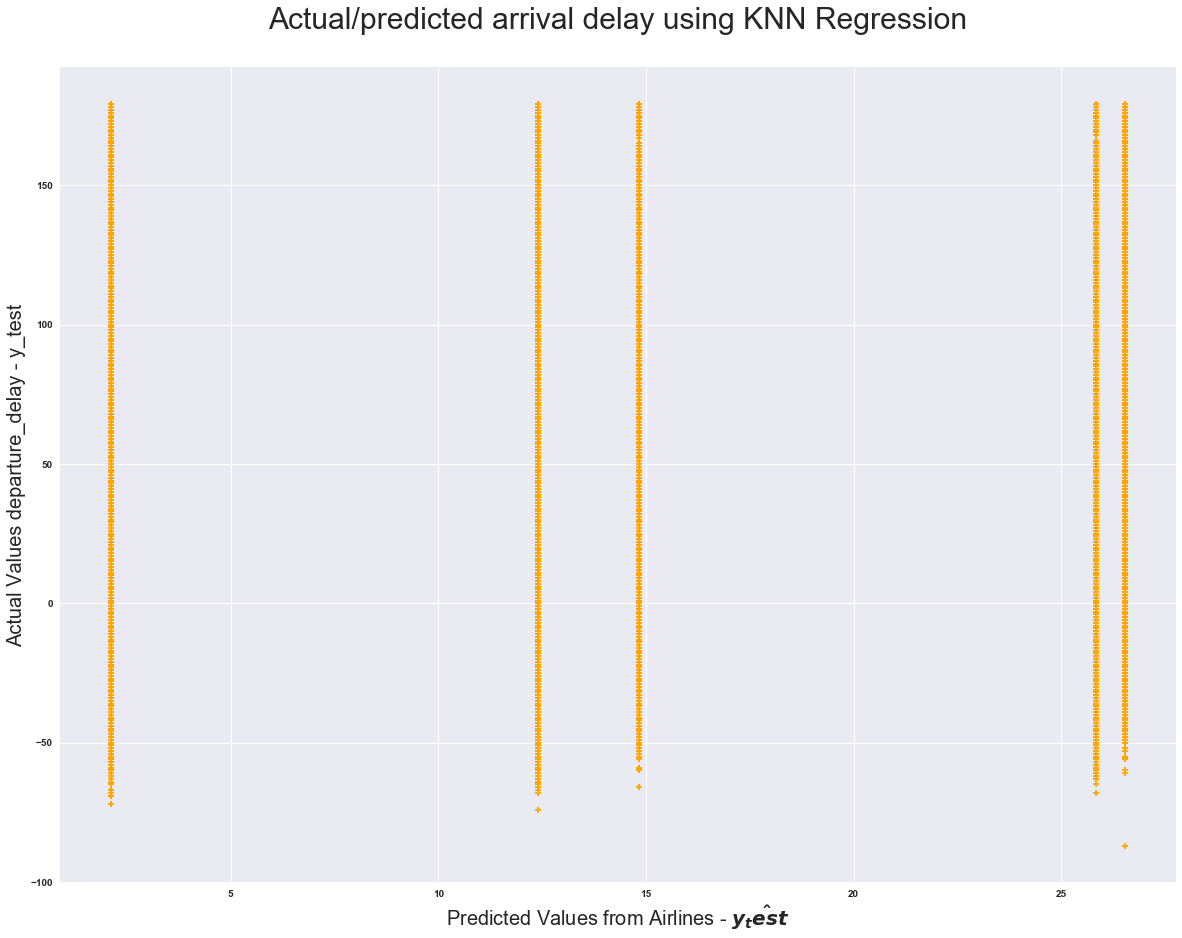

score:  -0.08


In [113]:
# Plot the model
plt.figure(figsize=(20,15))
plt.scatter(predictions, y_test, s=30, c='orange', marker='+', zorder=90)
plt.xlabel("Predicted Values from Airlines - $\hat{y_test}$", fontsize=20)
plt.ylabel("Actual Values departure_delay - y_test", fontsize=20)
plt.title('Actual/predicted arrival delay using KNN Regression\n', fontsize=30)
plt.savefig("./img/Arrival_Delay_ADA Boost_regression.png")
plt.show()

print ("score: ", np.round(score,decimals=2))

Our ADA boost model didn't perform well at all here and is getting the worst score between all models

So, in conclusion and from the above we can see that the random forest model if performing well with score of 0.14

<font color='Black' size=5>3.2 Significant Arrival Delay Prediction</font>
<br>

In this section I'm going to predict the significant arrival delay so let's convert this delay into a classification problem to see more about the flights that have a significant delay and the flight with non significant delay and in order to do that I'll consider all flights that is delayed for more than 60 minutes as significantly delayed with classifier one and the one which is not significantly delayed as 0 so let's do some EDA to achieve that and as well we'll start our modeling by using the airline,Month,day,dayofweek,distance,diverted and the newly created features as predictors and arrival delay as a target.

In [114]:
df['SIGNIFICANTLY_DELAYED']=df['ARRIVAL_DELAY'].map(lambda x: 0 if x < 60 else 1)

In [115]:
df.SIGNIFICANTLY_DELAYED.value_counts()

0    1808318
1     100398
Name: SIGNIFICANTLY_DELAYED, dtype: int64

let's see now the baseline for our model

In [116]:
print(f'SIGNIFICANTLY_DELAYED baseline is: {df.SIGNIFICANTLY_DELAYED.mean():.2f}')

SIGNIFICANTLY_DELAYED baseline is: 0.05


so based on our assumption we have almost ***100,398*** flights that have a really significant delay which is almost ***5%*** of the whole flights happened in 2015 domestically in the United States of America

now let's see again how what most airlines have this significant delay and which routs as well

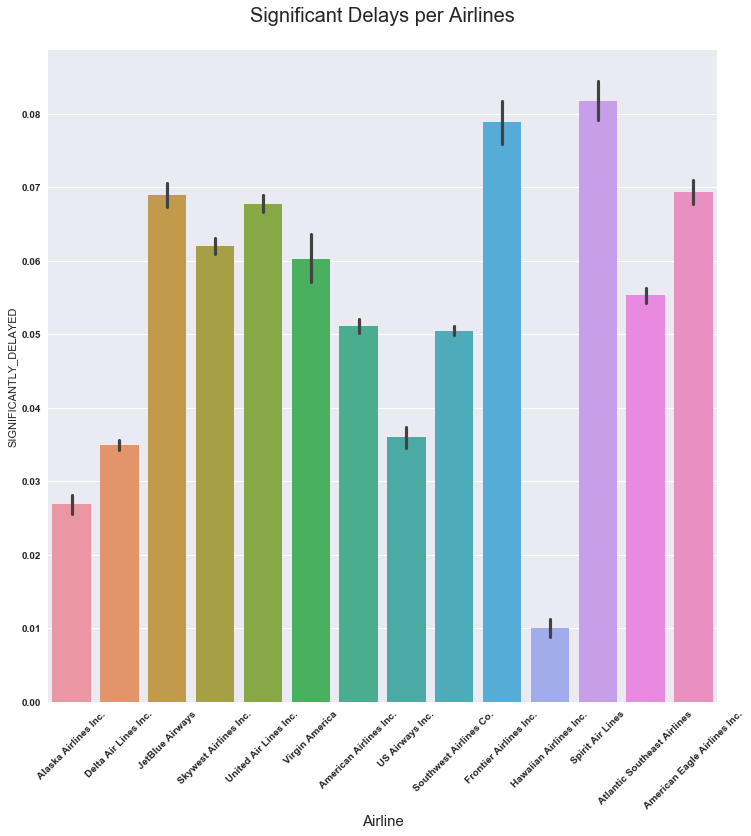

In [117]:
sns.barplot(y='SIGNIFICANTLY_DELAYED',x='AIRLINE',data=df,saturation=0.75)
plt.xlabel('Airline', fontsize=15)
plt.xticks(rotation=45)
plt.title('Significant Delays per Airlines\n', fontsize=20)
plt.savefig("./img/Significant_arrival_Delay_per_airline.png")
plt.show()

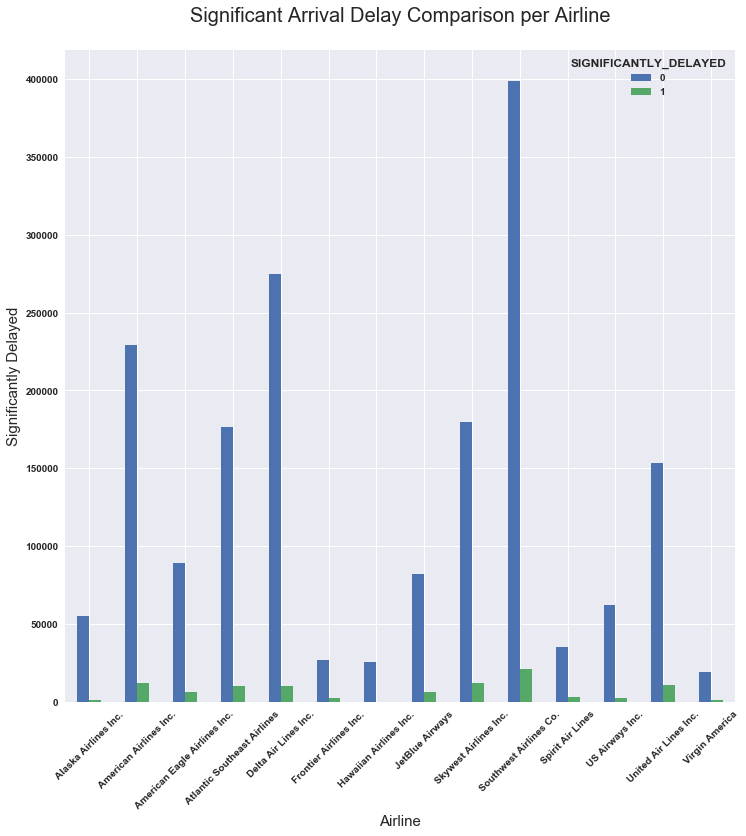

In [118]:
pd.crosstab(df.AIRLINE,df.SIGNIFICANTLY_DELAYED).plot(kind='bar')
plt.xlabel('Airline', fontsize=15)
plt.ylabel('Significantly Delayed', fontsize=15)
plt.xticks(rotation=45)
plt.title('Significant Arrival Delay Comparison per Airline\n', fontsize=20)
plt.savefig("./img/Significant Arrival delay comparison per airline.png")
plt.show()

From the above graphs we can see that there is a significant differences between all airlines in terms of the delays that is more than 60 minuets.

Now, let's build our model and in our case here I'm going to use most of the columns that could help us to build a good model and these columns are are the same columns we use in the regression modeling

In [119]:
y=df['SIGNIFICANTLY_DELAYED']
X=df[cols]

In [120]:
X=pd.get_dummies(X,drop_first=True)

In [121]:
y.shape,X.shape

((1908716,), (1908716, 27))

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

<font color='Black' size=4>3.2.1 predicting significant arrival delay using Logistic regression</font>
<br>

I'm going here to use the logistics regression with pipelining it.

In [123]:
model = LogisticRegression()
recall = 'recall'
results1 = model_selection.cross_val_score(model, X_train, y_train, cv=5, scoring=recall)
print("5-fold cross validation average recall: %.2f" % (results1.mean()))
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X_train, y_train, cv=5, scoring=scoring)
print("5-fold cross validation accuracy_score: %.2f" % (results.mean()))

5-fold cross validation average recall: 0.00
5-fold cross validation accuracy_score: 0.95


In [124]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)
predict_proba=model.predict_proba(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(
    model.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.95


In [125]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.95      1.00      0.97    542417
          1       0.00      0.00      0.00     30198

avg / total       0.90      0.95      0.92    572615



/anaconda3/envs/py27conda/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Here, our precision for getting prediction on the flights that is not significantly delayed is 95% however it can be seen here that our model is not predicting the significant delay at all.

Text(0.5,1,'2-class Precision-Recall curve: AP=0.10')

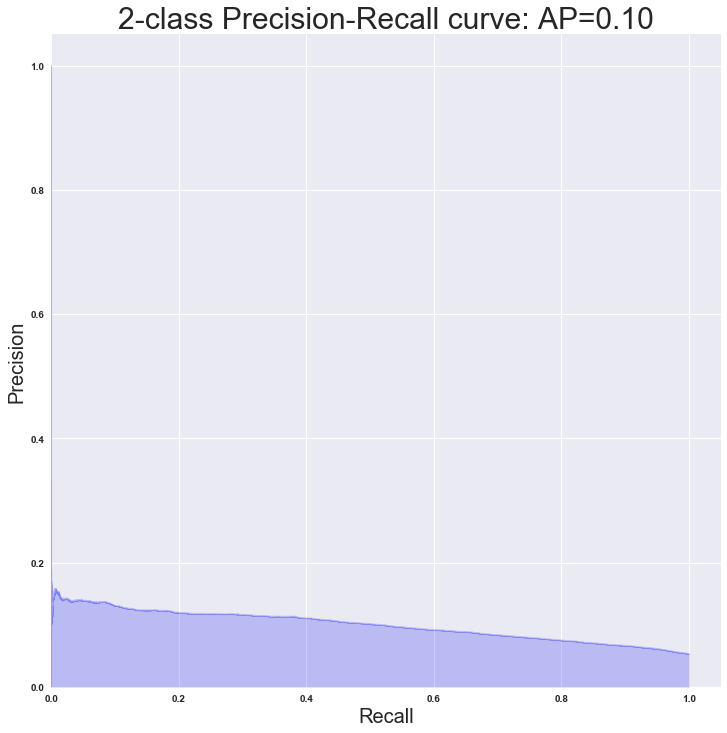

In [126]:
y_score = model.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)

precision, recall, _ = precision_recall_curve(y_test,y_score)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall',fontsize=20)
plt.ylabel('Precision',fontsize=20)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.05])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision),fontsize=30)

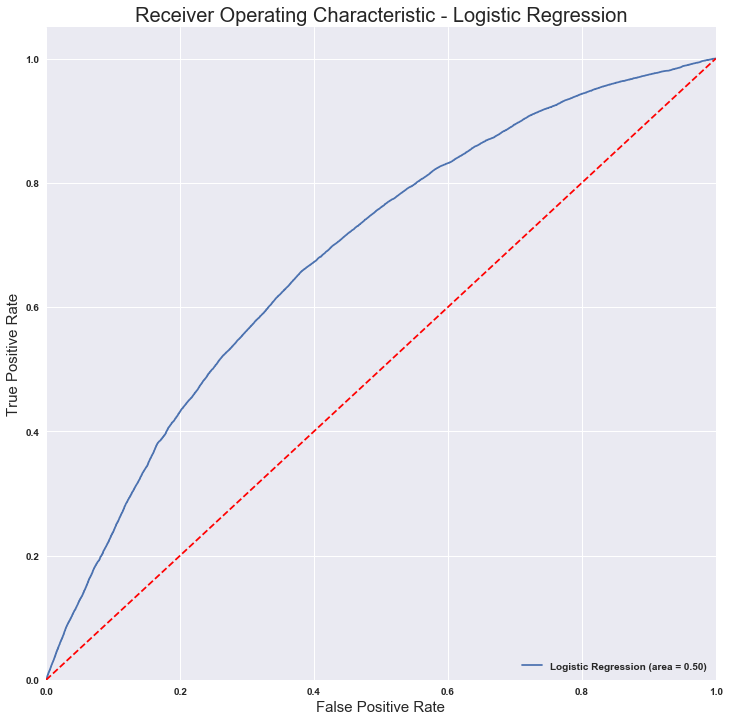

In [127]:
logit_roc_auc = roc_auc_score(y_test, predictions)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('True Positive Rate',fontsize=15)
plt.title('Receiver Operating Characteristic - Logistic Regression',fontsize=20)
plt.legend(loc="lower right")
plt.savefig("./img/Receiver Operating Characteristic - Logistic Regression.png")
plt.show()

In [128]:
pd.DataFrame({'FPR':fpr, 'TPR': tpr, 'Thresholds': thresholds}).head(10)

FPR       TPR  Thresholds
0  0.000000  0.000000    1.218630
1  0.000002  0.000000    0.218630
2  0.000004  0.000033    0.215124
3  0.000007  0.000033    0.213189
4  0.000013  0.000033    0.209679
5  0.000017  0.000033    0.208918
6  0.000018  0.000033    0.208576
7  0.000022  0.000033    0.206694
8  0.000024  0.000099    0.206685
9  0.000026  0.000099    0.206346

In [129]:
pd.DataFrame({'FPR':fpr, 'TPR': tpr, 'Thresholds': thresholds}).tail(10)

FPR       TPR  Thresholds
203353  0.999902  0.999967    0.003635
203354  0.999906  0.999967    0.003624
203355  0.999913  0.999967    0.003617
203356  0.999917  0.999967    0.003613
203357  0.999917  1.000000    0.003612
203358  0.999934  1.000000    0.003588
203359  0.999937  1.000000    0.003585
203360  0.999978  1.000000    0.003458
203361  0.999982  1.000000    0.003440
203362  1.000000  1.000000    0.001841

let's now try to gridsearch  our logistic regression model to get the best parameters

and now, let's gridsearch the logistic regression to see how we can improve more our logistic regression model

In [130]:
# create a hyperparameter dictionary for a logistic regression
_gs_params = {'penalty': ['l1', 'l2'],
              'solver': ['liblinear'],
              'C': np.logspace(-3, 0, 30)}

In [131]:
# create a gridsearch object using LogisticRegression() and the dictionary you created above
_gs = GridSearchCV(LogisticRegression(),
                   _gs_params,
                   n_jobs=-1, cv=4)

In [132]:
#fit the gridsearch object on your training data
_gs.fit(X_train,y_train)

GridSearchCV(cv=4, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'solver': ['liblinear'], 'C': array([0.001  , 0.00127, 0.00161, 0.00204, 0.00259, 0.00329, 0.00418,
       0.0053 , 0.00672, 0.00853, 0.01083, 0.01374, 0.01743, 0.02212,
       0.02807, 0.03562, 0.0452 , 0.05736, 0.07279, 0.09237, 0.11721,
       0.14874, 0.18874, 0.2395 , 0.30392, 0.38566, 0.48939, 0.62102,
       0.78805, 1.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [133]:
#print out the best parameters
_gs.best_params_

{'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}

In [134]:
#print out the best mean cross-validated score
np.round(_gs.best_score_,decimals=2)

0.95

In [135]:
#assign your best estimator to the variable 'best_logreg'
best_logreg=_gs.best_estimator_

In [136]:
#score your model on your testing data
np.round(best_logreg.score(X_test,y_test),decimals=2)

0.95

In [137]:
#use your test data to create your classification report
predictions = best_logreg.predict(X_test)
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.95      1.00      0.97    542417
          1       0.00      0.00      0.00     30198

avg / total       0.90      0.95      0.92    572615



/anaconda3/envs/py27conda/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Still, our model is getting the same results as can be seen from the above summary report even after gridsearching it

<font color='Black' size=4>3.2.2 predicting significant arrival delay using Random Forest Classifier</font>
<br>

Now, and as we got a poor accuracy using the logistic regression let's use another machine learning algorithm to see the if another better accuracy is coming or not and for that we are going to use Random Forest Classifier

In [138]:
model = RandomForestClassifier()

In [139]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print('Accuracy of Random Forest regression classifier on test set: {:.2f}'.format(
    model.score(X_test, y_test)))

Accuracy of Random Forest regression classifier on test set: 0.93


In [140]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.95      0.97      0.96    542417
          1       0.27      0.16      0.20     30198

avg / total       0.92      0.93      0.92    572615



Here, our precision for getting prediction on the flights that is not significantly delayed is 95% however it can be seen here that our model is predicting the significant delay at with a precision of 27% which is better than the logistic regression model.

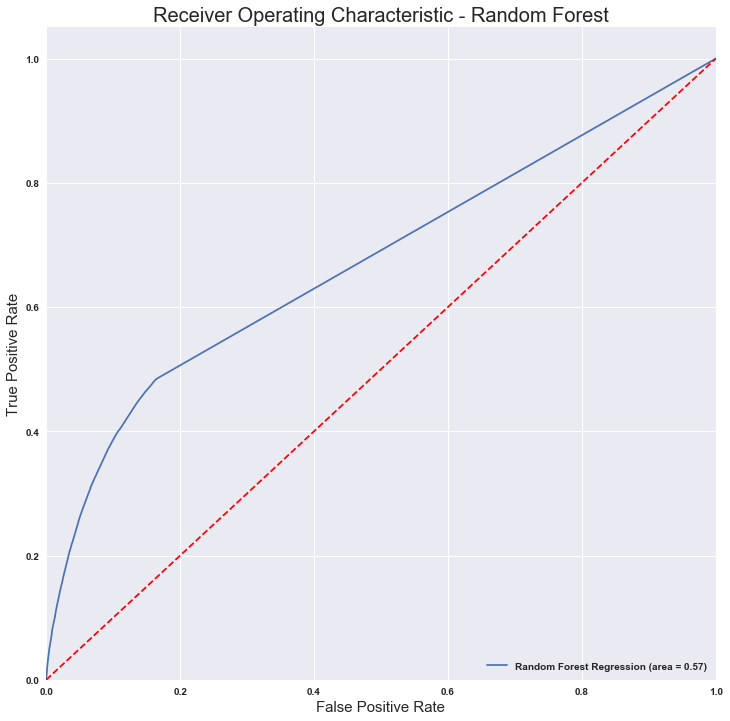

In [141]:
logit_roc_auc = roc_auc_score(y_test, predictions)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('True Positive Rate',fontsize=15)
plt.title('Receiver Operating Characteristic - Random Forest',fontsize=20)
plt.legend(loc="lower right")
plt.savefig("./img/Receiver Operating Characteristic - Random Forest.png")
plt.show()

As can be seen from the above graph that our slop till TPR of 0.5 is good as it is getting FPR less than 0.15 and after that its getting more FPR which is affecting our model.

Text(0.5,1,'2-class Precision-Recall curve: AP=0.09')

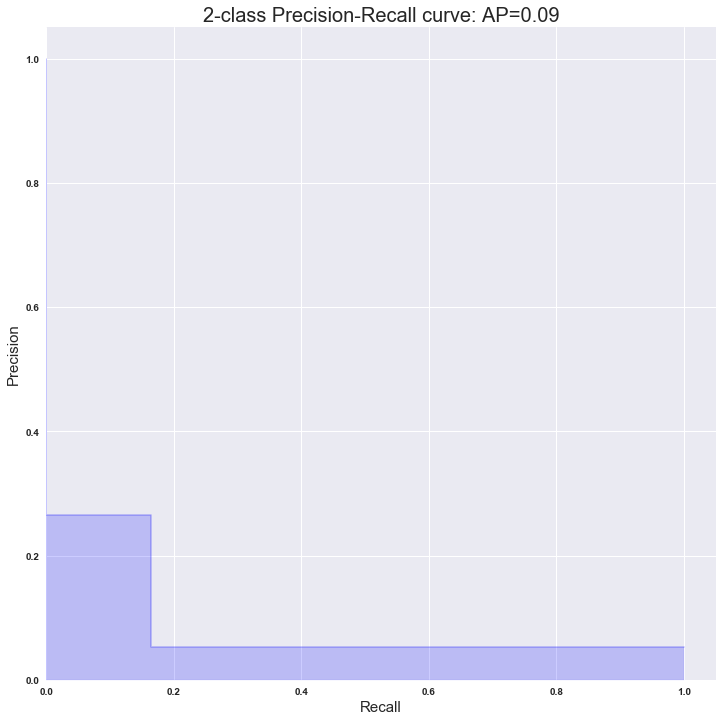

In [142]:
y_score = model.predict(X_test)
average_precision = average_precision_score(y_test, y_score)

precision, recall, _ = precision_recall_curve(y_test,y_score)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall',fontsize=15)
plt.ylabel('Precision',fontsize=15)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.05])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision),fontsize=20)

Using pipeline of Standard scalar and random forest classifier

In [143]:
model = Pipeline([('SS', StandardScaler()),
                    ('RFC', RandomForestClassifier(
                        max_features='sqrt', n_estimators=50, oob_score=True))
                    ])
model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('SS', StandardScaler(copy=True, with_mean=True, with_std=True)), ('RFC', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False))])

In [144]:
np.round(model.score(X_test, y_test),decimals=2)

0.93

In [145]:
predictions = model.predict(X_test)
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(
    model.score(X_test, y_test)))

Accuracy of Random Forest classifier on test set: 0.93


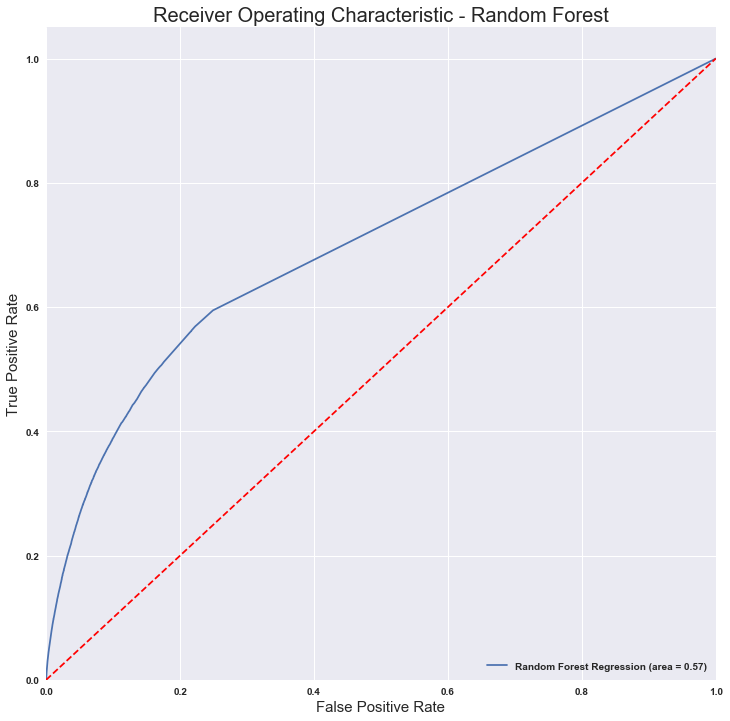

In [146]:

logit_roc_auc = roc_auc_score(y_test, predictions)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('True Positive Rate',fontsize=15)
plt.title('Receiver Operating Characteristic - Random Forest',fontsize=20)
plt.savefig("./img/Receiver Operating Characteristic - Random Forest.png")
plt.legend(loc="lower right")
plt.show()

By using gridsearching here we've got better results however as can be seen our slop till TPR of 0.6 is good as it is getting FPR less than 0.25 and after that its getting more FPR which is affecting our model.

Text(0.5,1,'2-class Precision-Recall curve: AP=0.09')

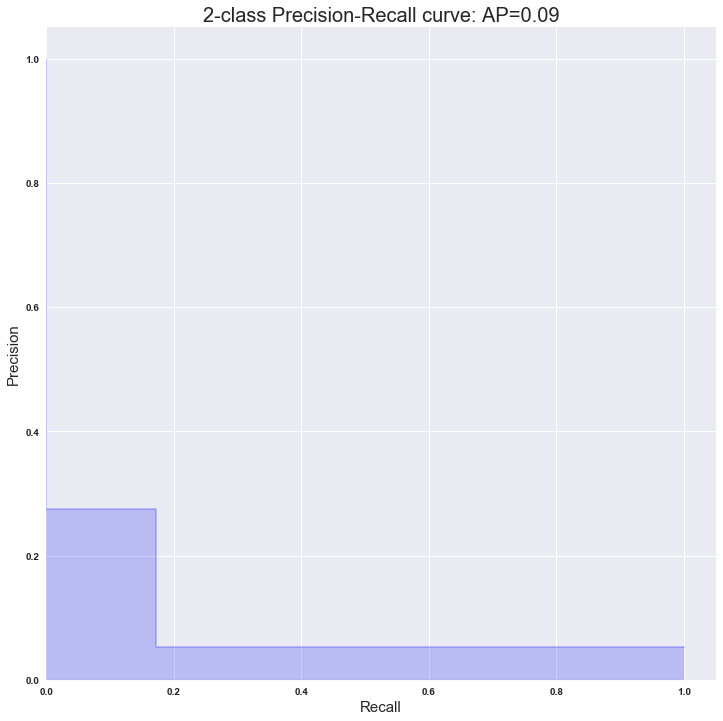

In [147]:
y_score = model.predict(X_test)
average_precision = average_precision_score(y_test, y_score)

precision, recall, _ = precision_recall_curve(y_test,y_score)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall',fontsize=15)
plt.ylabel('Precision',fontsize=15)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.05])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision),fontsize=20)

<font color='Black' size=4>3.2.3 predicting significant arrival delay using ADA Boost Classifier</font>
<br>

Now, and as we got a fair accuracy using the logistic regression  and Random Forest let's use another machine learning algorithm to see the if another better accuracy is coming or not and for that we are going to use Support ADA Boost Classifier

In [148]:
model= AdaBoostClassifier()

In [149]:
# model=svm.SVC(kernel='linear', probability=True,random_state=0)

In [150]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print('Accuracy of ADA Boost classifier on test set: {:.2f}'.format(
    model.score(X_test, y_test)))

Accuracy of ADA Boost classifier on test set: 0.95


In [151]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.95      1.00      0.97    542417
          1       0.00      0.00      0.00     30198

avg / total       0.90      0.95      0.92    572615



/anaconda3/envs/py27conda/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


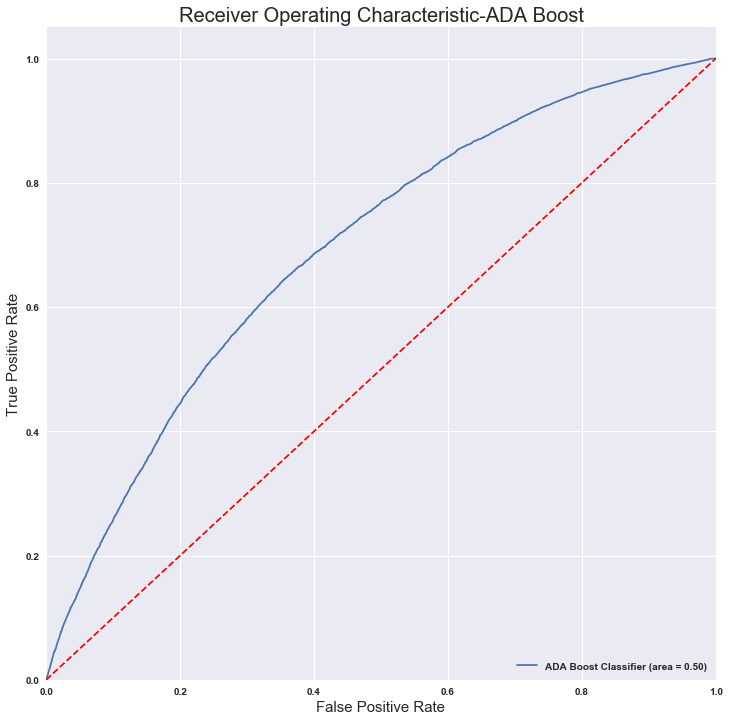

In [152]:
logit_roc_auc = roc_auc_score(y_test, predictions)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='ADA Boost Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('True Positive Rate',fontsize=15)
plt.title('Receiver Operating Characteristic-ADA Boost',fontsize=20)
plt.legend(loc="lower right")
plt.show()

It seems that here our ADA boost model is working similar to the Logistic regression and it is not predicting any significant delays at all

Text(0.5,1,'2-class Precision-Recall curve: AP=0.05')

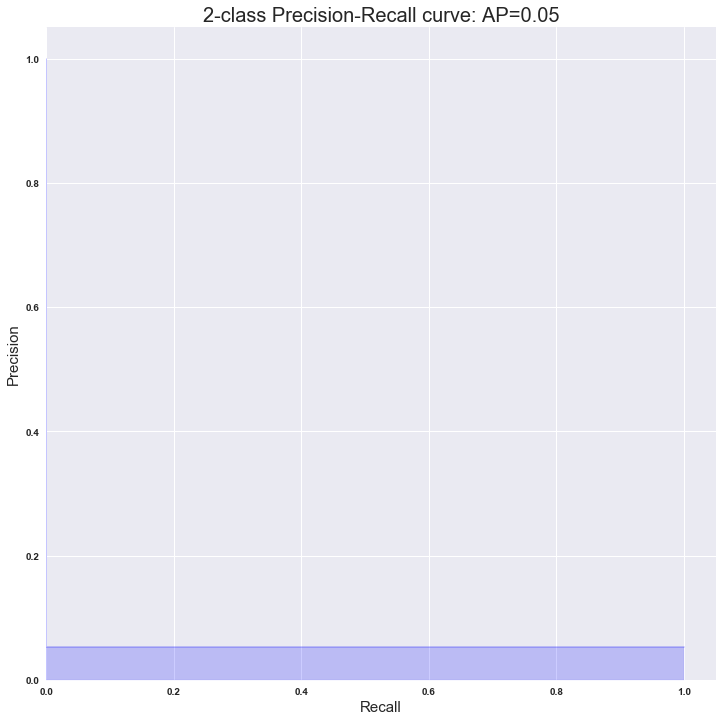

In [153]:
y_score = model.predict(X_test)
average_precision = average_precision_score(y_test, y_score)

precision, recall, _ = precision_recall_curve(y_test,y_score)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall',fontsize=15)
plt.ylabel('Precision',fontsize=15)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.05])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision),fontsize=20)

<font color='Black' size=5>3.3 Departure Delay Prediction</font>
<br>

In this section I'm going to predict the Departure delay let's start our modeling by using the airline, Month, day, dayofweek, distance, diverted and the newly created features as predictors and arrival delay as a target.

In [154]:
df = pd.read_csv("../../../../../sources/2015Flights.csv")

In [155]:
mask= df['CANCELLED']==0
df=df[mask]

Now, let's remove some outliers

In [156]:
percentileofscore(df.ARRIVAL_DELAY,180)

99.12506958523048

In [157]:
mask=df.DEPARTURE_DELAY<180
df=df[mask]

But first let's see our baseline for the Departure delay

In [158]:
print(f'Departure_DELAY baseline is: {df.DEPARTURE_DELAY.mean():.2f}')

Departure_DELAY baseline is: 7.80


In [159]:
cols = ['MONTH', 'DAY', 'DAY_OF_WEEK', 'DISTANCE', 'DIVERTED','AIRLINE',
        'IS_LAX-SFO_ROUTE', 'IS_SFO-LAX_ROUTE', 'IS_MT_ORIGIN_STATE', 'IS_UT_ORIGIN_STATE',
        'IS_NK_AIRLINE', 'IS_ILM_AIRPORT', 'IS_CNY_AIRPORT', 'IS_NIGHT_FLIGHT',
        'IS_MORNING_FLIGHT']

In [160]:
y=df['DEPARTURE_DELAY']

In [161]:
X=df[cols]

Now, let's dummyfiying  our predicted matrix

In [162]:
X=pd.get_dummies(X,drop_first=True)

In [163]:
y.shape,X.shape

((1908496,), (1908496, 27))

now let's creating our train/test datasets

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [165]:
y_test.describe()

count    572549.000000
mean          7.799820
std          26.108867
min         -68.000000
25%          -5.000000
50%          -1.000000
75%           8.000000
max         179.000000
Name: DEPARTURE_DELAY, dtype: float64

<font color='Black' size=4>3.3.1 predicting Departure delay using linear regression</font>
<br>

I'm going here to use the linear regression with pipelining it with Standard scalar

In [166]:
model = Pipeline(steps=[('ss',StandardScaler()),
                         ('linreg',LinearRegression())])

In [167]:
model.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('ss', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linreg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [168]:
predictions  =  model.predict(X_test)
score        =  model.score(X_test, y_test)

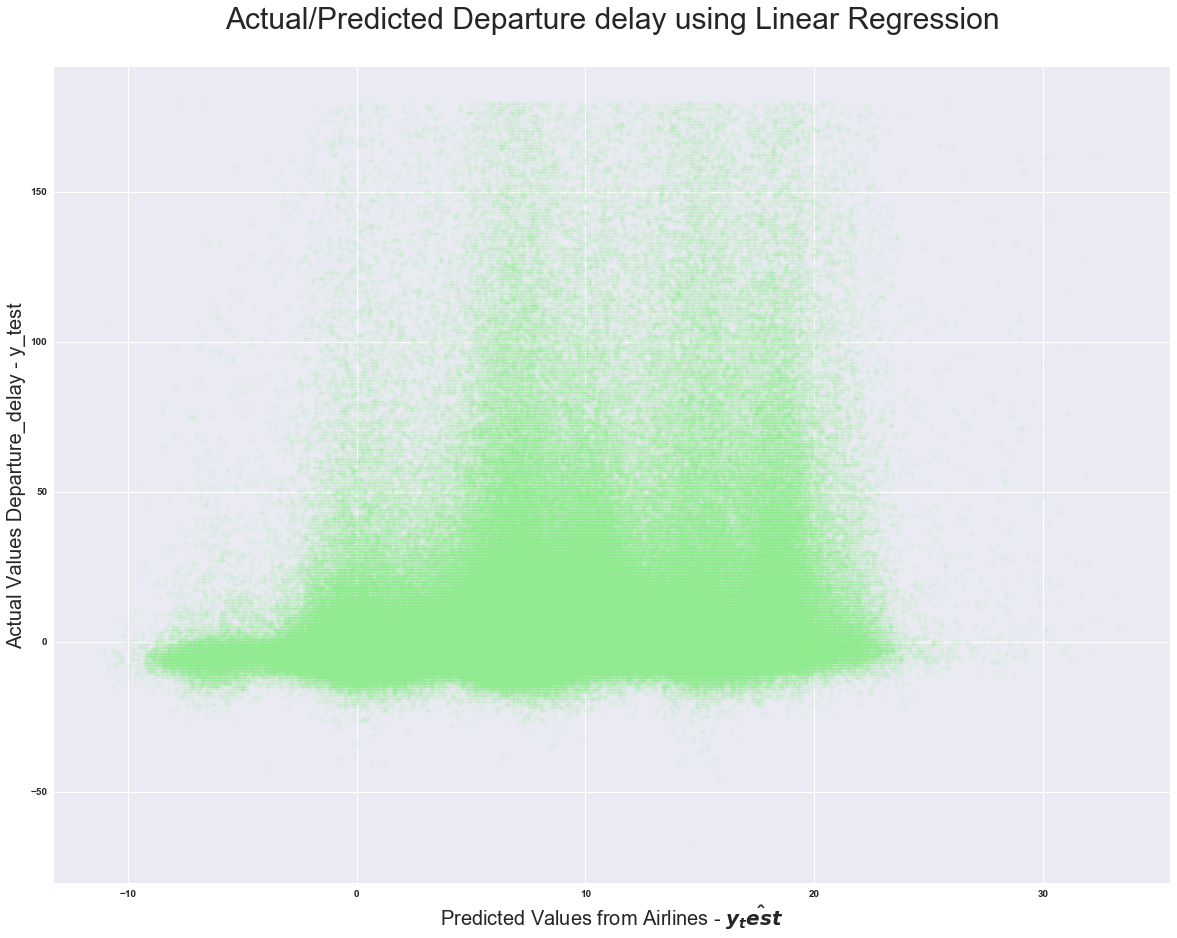

score:  0.06


In [169]:
# Plot the model
plt.figure(figsize=(20,15))
plt.scatter(predictions, y_test, s=30, c='lightgreen', marker='+', zorder=90, alpha=0.1)
plt.xlabel("Predicted Values from Airlines - $\hat{y_test}$", fontsize=20)
plt.ylabel("Actual Values Departure_delay - y_test",fontsize=20)
plt.title('Actual/Predicted Departure delay using Linear Regression\n', fontsize=30)
plt.savefig("./img/Departure_Delay_linear_regression.png")
plt.show()

print ("score: ", np.round(score,decimals=2))

we can see that our score is still fair as it is above our baseline (3.01) here and we need to try to enhance it to have a good model and let's try to see other regression models

<font color='Black' size=4>3.3.2 Predicting Departure delay using Random Forest regression</font>
<br>

I'm going here to use the linear regression with pipelining it with Standard scalar
Using Random Forest Regression


In [170]:
model = RandomForestRegressor(max_depth=20, n_estimators=30, random_state=0)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [171]:
predictions=model.predict(X_test)
score=model.score(X_test,y_test)

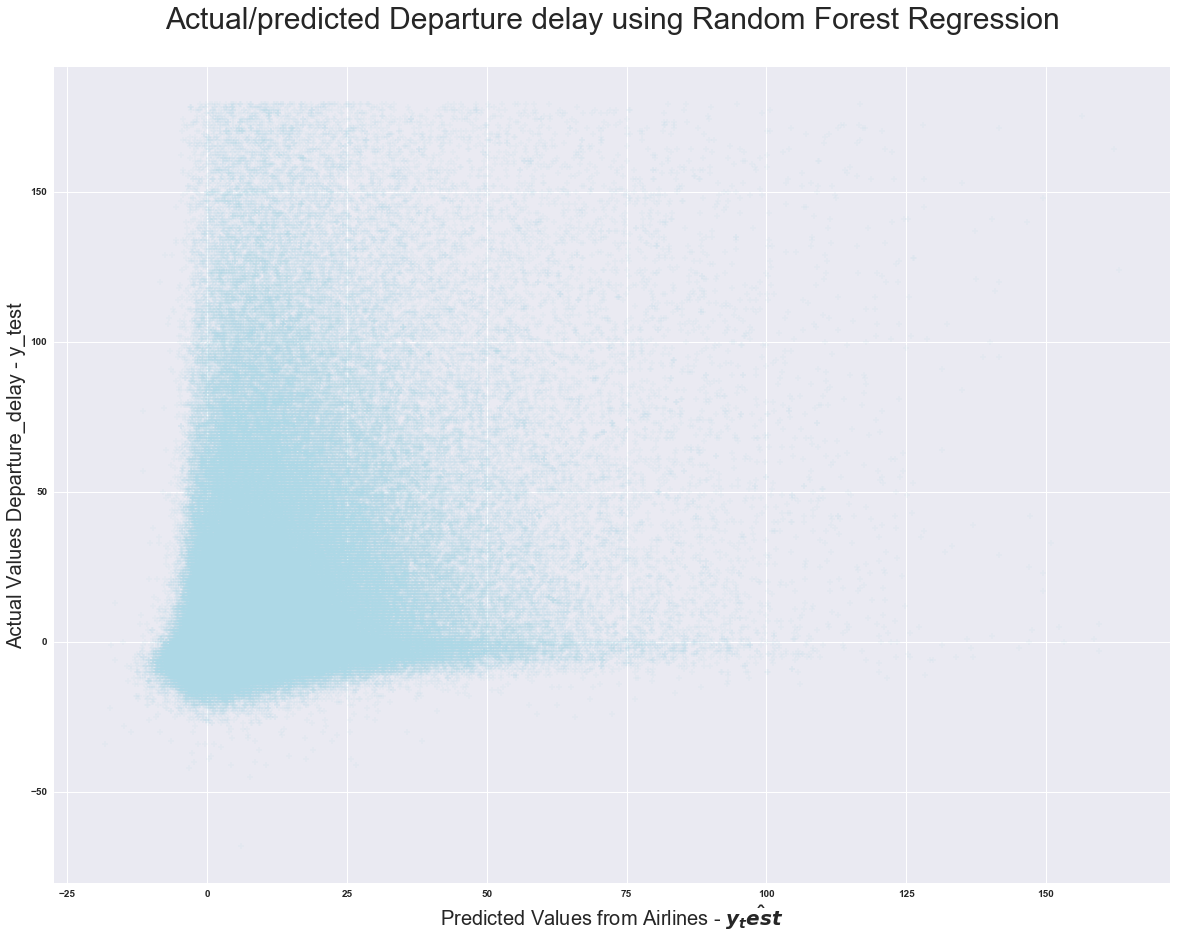

score:  0.13


In [172]:
# Plot the model
plt.figure(figsize=(20,15))
plt.scatter(predictions, y_test, s=30, c='lightblue', marker='+', zorder=90, alpha=0.1)
plt.xlabel("Predicted Values from Airlines - $\hat{y_test}$", fontsize=20)
plt.ylabel("Actual Values Departure_delay - y_test", fontsize=20)
plt.title('Actual/predicted Departure delay using Random Forest Regression\n', fontsize=30)
plt.savefig("./img/Departure_Delay_RF_regression.png")
plt.show()

print ("score: ", np.round(score,decimals=2))

In [173]:
print(model.feature_importances_)

[6.39121868e-02 1.81084921e-01 8.52019437e-02 4.61825175e-01
 5.57249914e-03 2.67083601e-03 2.61756039e-03 1.51576674e-03
 4.97400373e-03 1.82388013e-03 2.07872844e-04 4.27527381e-06
 8.39815711e-02 3.32985354e-02 5.68134330e-03 6.47929982e-03
 4.77782326e-03 9.29041209e-03 3.09005993e-03 3.14315415e-03
 4.16262250e-03 5.21372199e-03 1.13547744e-02 1.89710467e-03
 1.98336943e-03 1.09930804e-02 3.24220735e-03]


<font color='Black' size=4>3.3.3 Predicting Departure delay using KNN regression</font>
<br>

I'm going here to use the KNN regression with pipelining it with Standard scalar
Using Random Forest Regression

In [174]:
model = KNeighborsRegressor(n_neighbors=10)
model.fit(X_train, y_train) 

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=10, p=2,
          weights='uniform')

In [175]:
predictions=model.predict(X_test)
score=model.score(X_test,y_test)

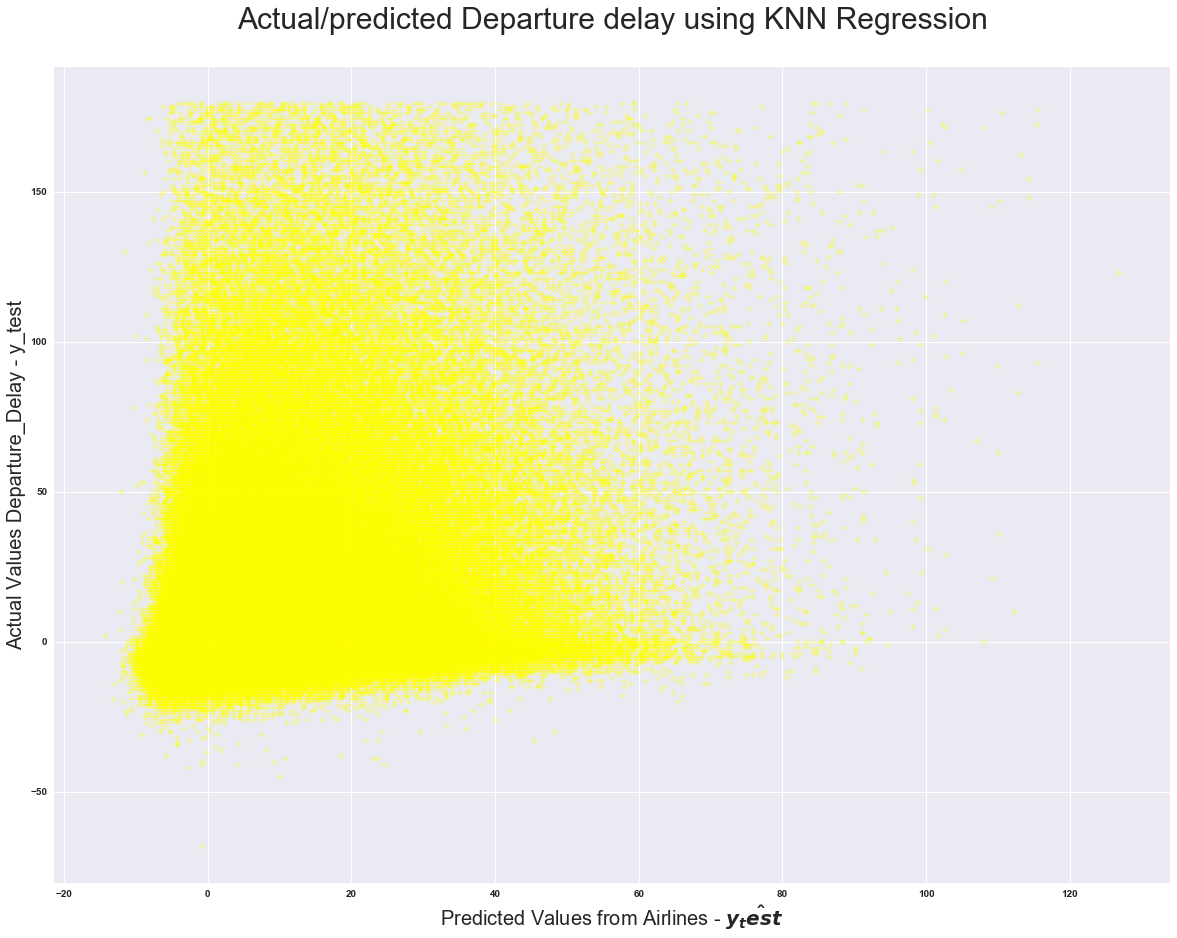

score:  0.09


In [176]:
# Plot the model
plt.figure(figsize=(20,15))
plt.scatter(predictions, y_test, s=30, c='yellow', marker='+', zorder=90,alpha=0.3)
plt.xlabel("Predicted Values from Airlines - $\hat{y_test}$", fontsize=20)
plt.ylabel("Actual Values Departure_Delay - y_test", fontsize=20)
plt.title('Actual/predicted Departure delay using KNN Regression\n', fontsize=30)
plt.savefig("./img/Departure_Delay_KNN_regression.png")
plt.show()

print ("score: ", np.round(score,decimals=2))

so from the above we can see that the random forest model if performing well with score of 0.14

<font color='Black' size=4>3.3.4 Predicting Departure delay using Random ADA Boost regression</font>
<br>

I'm going here to use the ADA Boost regression with pipelining it with Standard scalar
Using ADA Boost Regression

In [177]:
#param_dist = {
# 'learning_rate' : [0.01,0.05] #0.1,0.3,1]
# #'loss' : ['linear', 'square', 'exponential']
# }

#pre_gs_inst = GridSearchCV(AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=2),
#                                                    n_estimators=100),
# param_dist,
# cv=3,
# n_jobs=-1,
# verbose=1
#                          )

#pre_gs_inst.fit(X_train, y_train)

In [178]:
abr = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=2),
                                                    n_estimators=100)

abr.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         learning_rate=1.0, loss='linear', n_estimators=100,
         random_state=None)

In [179]:
predictions=abr.predict(X_test)
score=abr.score(X_test,y_test)

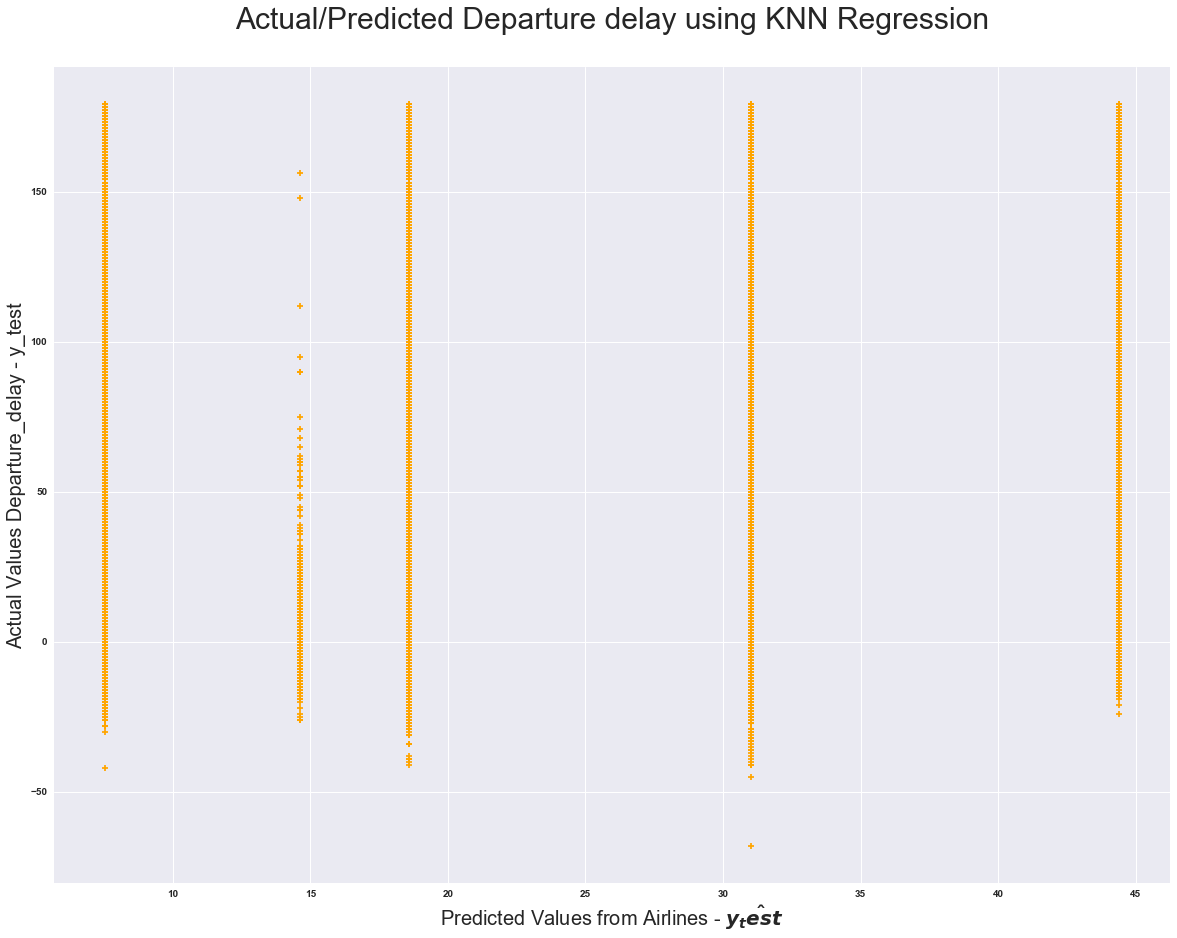

score:  -0.14


In [180]:
# Plot the model
plt.figure(figsize=(20,15))
plt.scatter(predictions, y_test, s=30, c='orange', marker='+', zorder=90)
plt.xlabel("Predicted Values from Airlines - $\hat{y_test}$", fontsize=20)
plt.ylabel("Actual Values Departure_delay - y_test", fontsize=20)
plt.title('Actual/Predicted Departure delay using KNN Regression\n', fontsize=30)
plt.savefig("./img/Departure_Delay_ADA Boost_regression.png")
plt.show()

print ("score: ", np.round(score,decimals=2))

<font color='Black' size=5>3.4 Significant Departure Delay Prediction</font>
<br>

In this section I'm going to predict the significant Departure delay so let's convert this delay into a classification problem to see more about the flights that have a significant delay and the flight with non significant delay and in order to do that I'll consider all flights that is delayed for more than 60 minutes as significantly delayed with classifier one and the one which is not significantly delayed as 0 so let's do some EDA to achieve that and as well we'll start our modeling by using the airline,Month,day,dayofweek,distance,diverted and the newly created features as predictors and Departure delay as a target.

In [181]:
df['DEP_SIGNIFICANTLY_DELAYED']=df['DEPARTURE_DELAY'].map(lambda x: 0 if x < 60 else 1)

In [182]:
df.DEP_SIGNIFICANTLY_DELAYED.value_counts()

0    1806964
1     101532
Name: DEP_SIGNIFICANTLY_DELAYED, dtype: int64

let's see now the baseline for our model

In [183]:
print(f'DEP_SIGNIFICANTLY_DELAYED baseline is: {df.DEP_SIGNIFICANTLY_DELAYED.mean():.2f}')

DEP_SIGNIFICANTLY_DELAYED baseline is: 0.05


so based on our assumption we have almost ***101,532*** flights that have a really significant delay which is almost ***5%*** of the whole flights happened in 2015 domestically in the United States of America

now let's see again how what most airlines have this significant delay and which routs as well

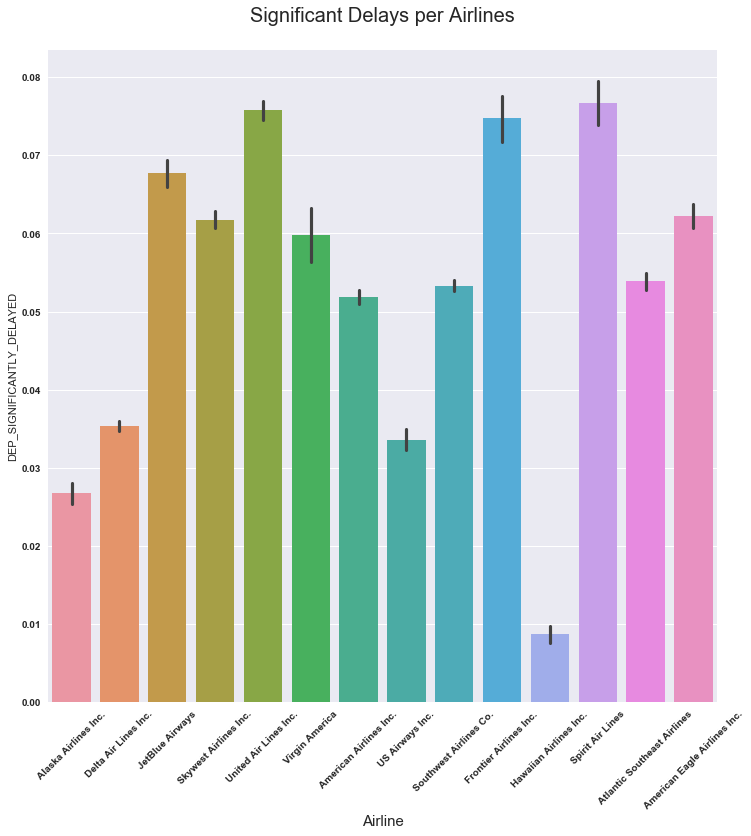

In [184]:
sns.barplot(y='DEP_SIGNIFICANTLY_DELAYED',x='AIRLINE',data=df,saturation=0.75)
plt.xlabel('Airline', fontsize=15)
plt.xticks(rotation=45)
plt.title('Significant Delays per Airlines\n', fontsize=20)
plt.savefig("./img/Significant_DEPARTURE_Delay_per_airline.png")
plt.show()

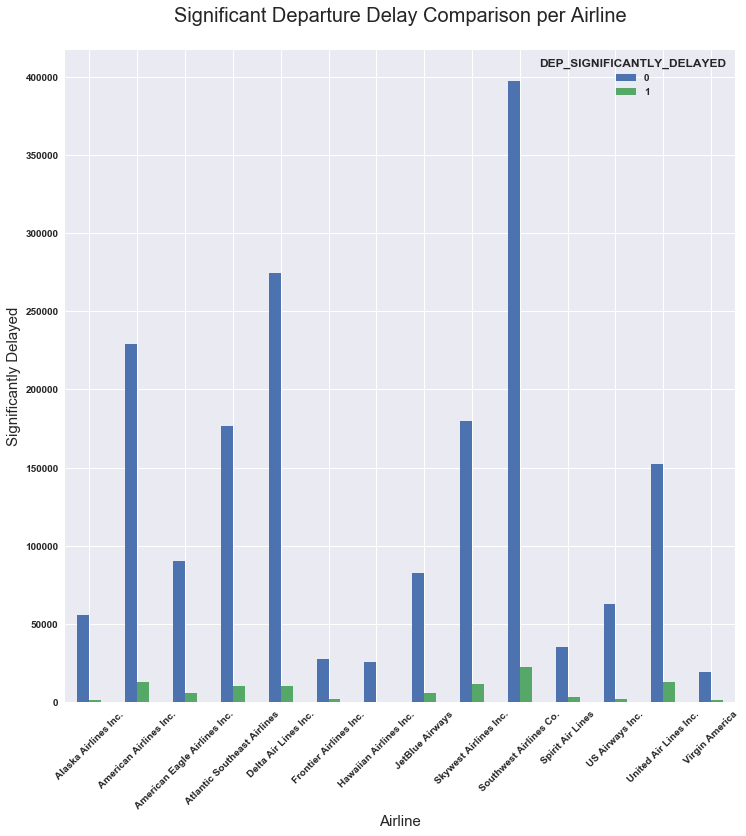

In [185]:
pd.crosstab(df.AIRLINE,df.DEP_SIGNIFICANTLY_DELAYED).plot(kind='bar')
plt.xlabel('Airline', fontsize=15)
plt.ylabel('Significantly Delayed', fontsize=15)
plt.xticks(rotation=45)
plt.title('Significant Departure Delay Comparison per Airline\n', fontsize=20)
plt.savefig("./img/Significant Departure delay comparison per airline.png")
plt.show()

now let's build our model and in our case here i'm going to use most of the columns that could help us to build a good model and these columns are are the same columns we use in the regression modeling

In [186]:
y=df['DEP_SIGNIFICANTLY_DELAYED']
X=df[cols]

In [187]:
X=pd.get_dummies(X,drop_first=True)

In [188]:
y.shape,X.shape

((1908496,), (1908496, 27))

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

<font color='Black' size=4>3.4.1 Predicting significant Departure delay using Logistic regression</font>
<br>

I'm going here to use the logistics regression with pipelining it.

In [190]:
model = LogisticRegression()
recall = 'recall'
results1 = model_selection.cross_val_score(model, X_train, y_train, cv=5, scoring=recall)
print("5-fold cross validation average recall: %.2f" % (results1.mean()))
scoring = 'accuracy'
results = model_selection.cross_val_score(model, X_train, y_train, cv=5, scoring=scoring)
print("5-fold cross validation accuracy_score: %.2f" % (results.mean()))

5-fold cross validation average recall: 0.00
5-fold cross validation accuracy_score: 0.95


In [191]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)
predict_proba=model.predict_proba(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(
    model.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.95


In [192]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.95      1.00      0.97    542040
          1       0.00      0.00      0.00     30509

avg / total       0.90      0.95      0.92    572549



/anaconda3/envs/py27conda/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Text(0.5,1,'2-class Precision-Recall curve: AP=0.10')

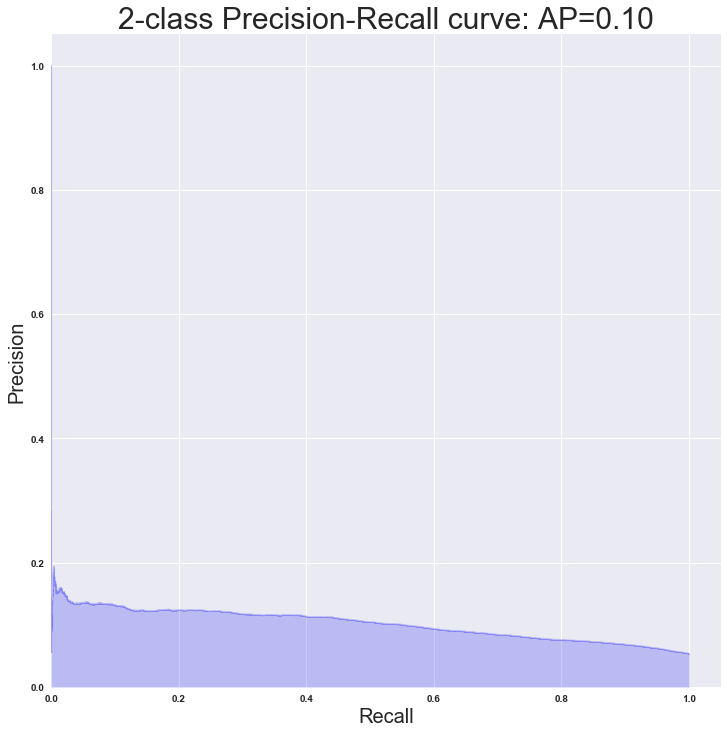

In [193]:
y_score = model.decision_function(X_test)
average_precision = average_precision_score(y_test, y_score)

precision, recall, _ = precision_recall_curve(y_test,y_score)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall',fontsize=20)
plt.ylabel('Precision',fontsize=20)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.05])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision),fontsize=30)

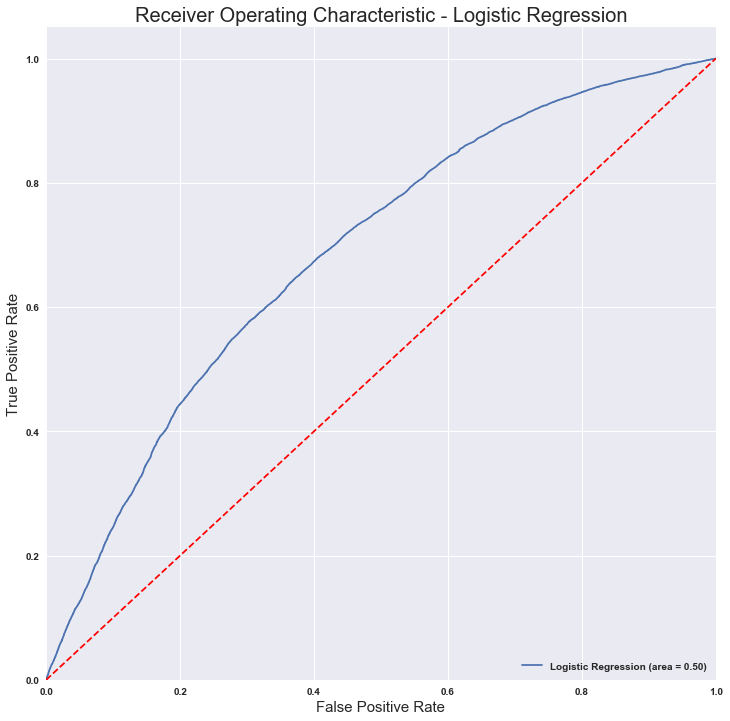

In [194]:
logit_roc_auc = roc_auc_score(y_test, predictions)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('True Positive Rate',fontsize=15)
plt.title('Receiver Operating Characteristic - Logistic Regression',fontsize=20)
plt.legend(loc="lower right")
plt.savefig("./img/Receiver Operating Characteristic Dep- Logistic Regression.png")
plt.show()

In [195]:
pd.DataFrame({'FPR':fpr, 'TPR': tpr, 'Thresholds': thresholds}).head(10)

FPR       TPR  Thresholds
0  0.000000  0.000033    0.208058
1  0.000009  0.000033    0.194309
2  0.000009  0.000066    0.194001
3  0.000017  0.000066    0.187164
4  0.000020  0.000066    0.184781
5  0.000026  0.000066    0.183530
6  0.000033  0.000066    0.180680
7  0.000037  0.000066    0.180219
8  0.000050  0.000066    0.178733
9  0.000061  0.000066    0.177969

In [196]:
pd.DataFrame({'FPR':fpr, 'TPR': tpr, 'Thresholds': thresholds}).tail(10)

FPR  TPR  Thresholds
203490  0.999904  1.0    0.007855
203491  0.999910  1.0    0.007850
203492  0.999913  1.0    0.007850
203493  0.999917  1.0    0.007849
203494  0.999921  1.0    0.007844
203495  0.999923  1.0    0.007843
203496  0.999928  1.0    0.007839
203497  0.999946  1.0    0.007773
203498  0.999950  1.0    0.007762
203499  1.000000  1.0    0.007185

let's now try to gridsearch  our logistic regression model to get the best parameters

and now, let's gridsearch the logistic regression to see how we can improve more our logistic regression model

In [197]:
# create a hyperparameter dictionary for a logistic regression
_gs_params = {'penalty': ['l1', 'l2'],
              'solver': ['liblinear'],
              'C': np.logspace(-3, 0, 30)}

In [198]:
# create a gridsearch object using LogisticRegression() and the dictionary you created above
_gs = GridSearchCV(LogisticRegression(),
                   _gs_params,
                   n_jobs=-1, cv=4)

In [199]:
#fit the gridsearch object on your training data
_gs.fit(X_train,y_train)

GridSearchCV(cv=4, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'solver': ['liblinear'], 'C': array([0.001  , 0.00127, 0.00161, 0.00204, 0.00259, 0.00329, 0.00418,
       0.0053 , 0.00672, 0.00853, 0.01083, 0.01374, 0.01743, 0.02212,
       0.02807, 0.03562, 0.0452 , 0.05736, 0.07279, 0.09237, 0.11721,
       0.14874, 0.18874, 0.2395 , 0.30392, 0.38566, 0.48939, 0.62102,
       0.78805, 1.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [200]:
#print out the best parameters
_gs.best_params_

{'C': 0.001, 'penalty': 'l1', 'solver': 'liblinear'}

In [201]:
#print out the best mean cross-validated score
np.round(_gs.best_score_,decimals=2)

0.95

In [202]:
#assign your best estimator to the variable 'best_logreg'
best_logreg=_gs.best_estimator_

In [203]:
#score your model on your testing data
np.round(best_logreg.score(X_test,y_test),decimals=2)

0.95

In [204]:
#use your test data to create your classification report
predictions = best_logreg.predict(X_test)
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.95      1.00      0.97    542040
          1       0.00      0.00      0.00     30509

avg / total       0.90      0.95      0.92    572549



/anaconda3/envs/py27conda/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<font color='Black' size=4>3.4.2 Predicting significant Departure delay using Random Forest Classifier</font>
<br>

Now, and as we got a fair accuracy using the logistic regression let's use another machine learning algorithm to see the if another better accuracy is coming or not and for that we are going to use Random Forest Classifier

In [205]:
model = RandomForestClassifier()

In [206]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print('Accuracy of Random Forest regression classifier on test set: {:.2f}'.format(
    model.score(X_test, y_test)))

Accuracy of Random Forest regression classifier on test set: 0.93


In [207]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.95      0.97      0.96    542040
          1       0.26      0.16      0.20     30509

avg / total       0.92      0.93      0.92    572549



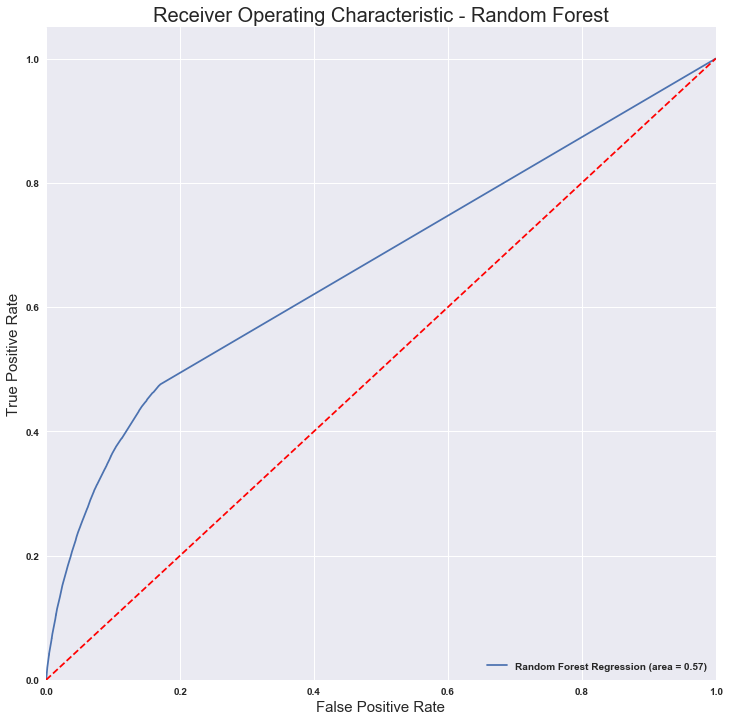

In [208]:
logit_roc_auc = roc_auc_score(y_test, predictions)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('True Positive Rate',fontsize=15)
plt.title('Receiver Operating Characteristic - Random Forest',fontsize=20)
plt.legend(loc="lower right")
plt.savefig("./img/Receiver Operating Characteristic Departure- Random Forest.png")
plt.show()

Text(0.5,1,'2-class Precision-Recall curve: AP=0.09')

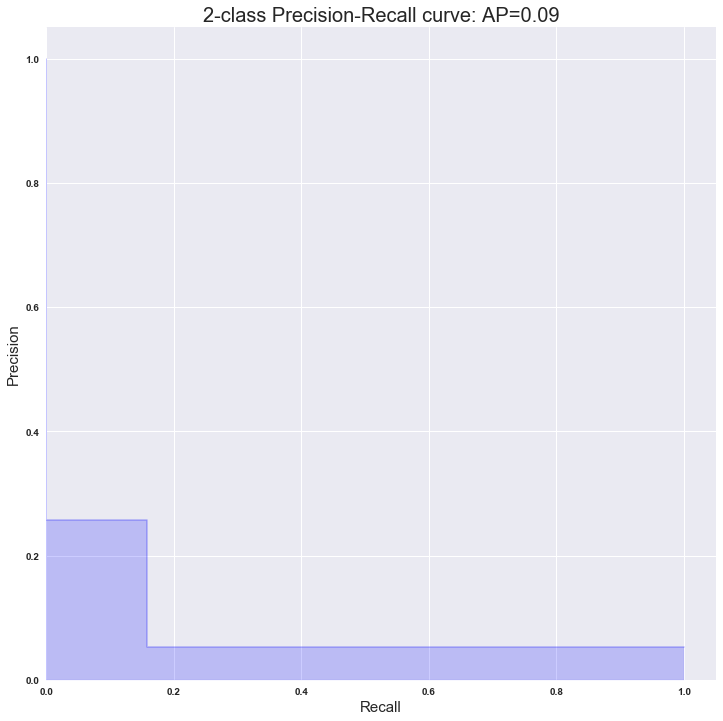

In [209]:
y_score = model.predict(X_test)
average_precision = average_precision_score(y_test, y_score)

precision, recall, _ = precision_recall_curve(y_test,y_score)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall',fontsize=15)
plt.ylabel('Precision',fontsize=15)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.05])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision),fontsize=20)

Using pipeline of Standard scalar and random forest classifier

In [210]:
model = Pipeline([('SS', StandardScaler()),
                    ('RFC', RandomForestClassifier(
                        max_features='sqrt', n_estimators=50, oob_score=True))
                    ])
model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('SS', StandardScaler(copy=True, with_mean=True, with_std=True)), ('RFC', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=True, random_state=None, verbose=0, warm_start=False))])

In [211]:
np.round(model.score(X_test, y_test),decimals=2)

0.93

In [212]:
predictions = model.predict(X_test)
print('Accuracy of Random Forest classifier on test set: {:.2f}'.format(
    model.score(X_test, y_test)))

Accuracy of Random Forest classifier on test set: 0.93


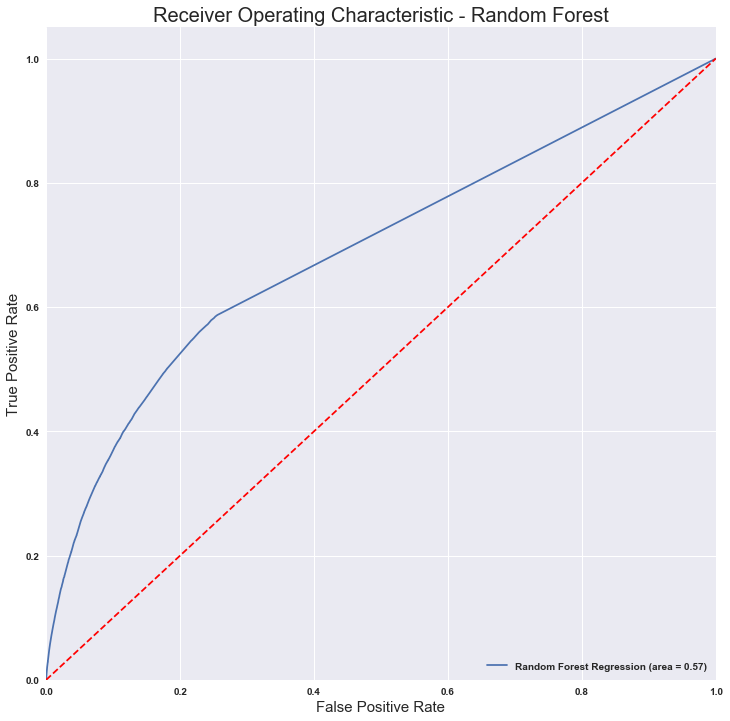

In [213]:

logit_roc_auc = roc_auc_score(y_test, predictions)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('True Positive Rate',fontsize=15)
plt.title('Receiver Operating Characteristic - Random Forest',fontsize=20)
plt.savefig("./img/Receiver Operating Characteristic Departure- Random Forest.png")
plt.legend(loc="lower right")
plt.show()

Text(0.5,1,'2-class Precision-Recall curve: AP=0.09')

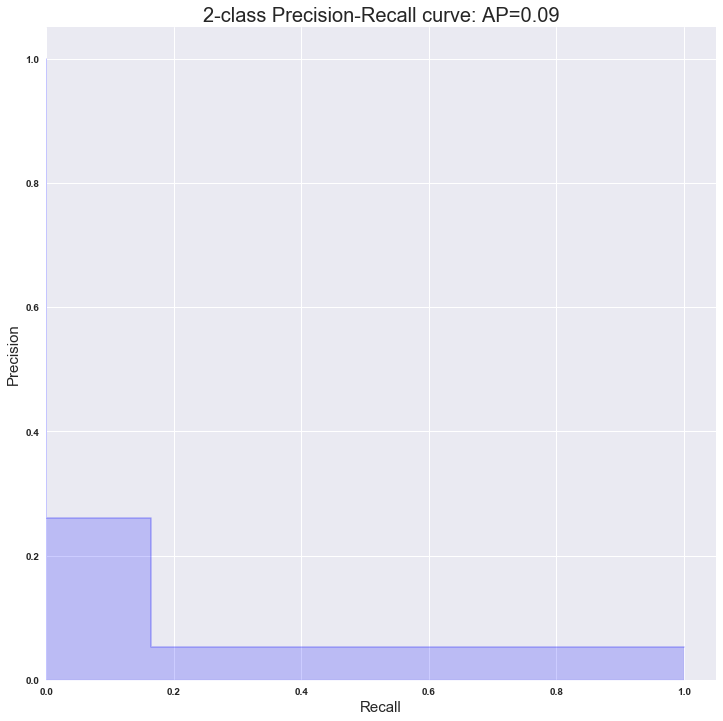

In [214]:
y_score = model.predict(X_test)
average_precision = average_precision_score(y_test, y_score)

precision, recall, _ = precision_recall_curve(y_test,y_score)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall',fontsize=15)
plt.ylabel('Precision',fontsize=15)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.05])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision),fontsize=20)

<font color='Black' size=4>3.4.3 predicting significant Departure delay using ADA Boost Classifier</font>
<br>

Now, and as we got a fair accuracy using the logistic regression  and Random Forest let's use another machine learning algorithm to see the if another better accuracy is coming or not and for that we are going to use Support ADA Boost Classifier

In [215]:
model= AdaBoostClassifier()

In [216]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print('Accuracy of ADA Boost classifier on test set: {:.2f}'.format(
    model.score(X_test, y_test)))

Accuracy of ADA Boost classifier on test set: 0.95


In [217]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.95      1.00      0.97    542040
          1       0.00      0.00      0.00     30509

avg / total       0.90      0.95      0.92    572549



/anaconda3/envs/py27conda/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


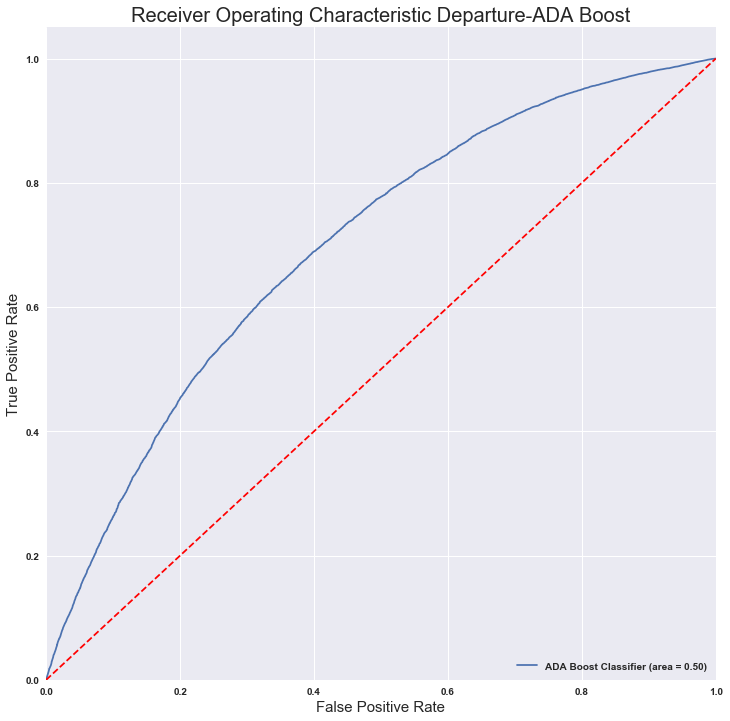

In [218]:
logit_roc_auc = roc_auc_score(y_test, predictions)
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='ADA Boost Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('True Positive Rate',fontsize=15)
plt.title('Receiver Operating Characteristic Departure-ADA Boost',fontsize=20)
plt.legend(loc="lower right")
plt.show()

Text(0.5,1,'2-class Precision-Recall curve: AP=0.05')

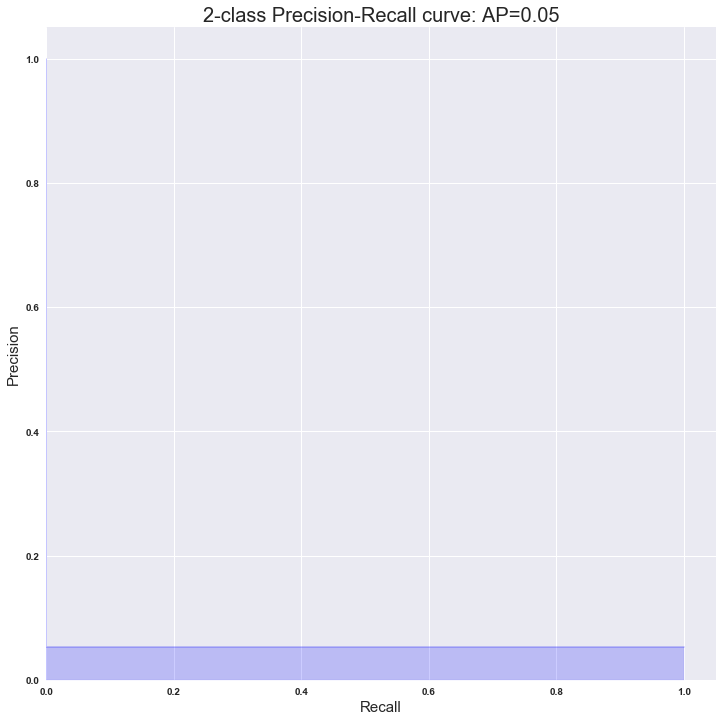

In [219]:
y_score = model.predict(X_test)
average_precision = average_precision_score(y_test, y_score)

precision, recall, _ = precision_recall_curve(y_test,y_score)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall',fontsize=15)
plt.ylabel('Precision',fontsize=15)
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.05])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(
          average_precision),fontsize=20)

<font color='Black' size=6>4. Summary </font>
<br>


In this project, my first intention was to predict the flights arrival delay and as much as i go deeper and deeper i found that predicting the significant delay could be an option as well which was a good assumption for passengers,airlines, and airports in terms of having an effective plan for the passengers and avoid such huge delays, and for the airports this study intended to save cost for them and optimize the space as much as they can , and finally for the airlines was to help then cut unplanned cost of having guest delayed and worst case scenario to have them all on hotel(s).
i have started this project with my Exploratory Data Analysis to load the datasets into my data frames and then i have started to look into how to generate features from the available columns, after that i have started to join my data frames in order to have a unified desirable data presented in a nice way of having the column code and description in the same data frame.
and after having all data available in one dataset i have started to plot some nice graphs using tableau which was very helpful in understanding my data and features and what can really benefit from.
then i came to the last part which was the modeling part and as can be seen from the above, i have creating a four parts of prediction models two for the arrival delay and it's significant delay of more than 60 minuets as a classification problem, and the same for the departure delay.
In the first model i have used linear regression with a pipeline, however that was not good enough for my model and that's why i started to use the random forest model which was the best results along of four regressors, the KNN performs better than the linear but not as good as the Random forest, and finally the ADA boost was the worst models in terms of predicting the arrival delay,
In the second model, i have created another columns to distinguish between the flight that arrived with delay more than 60 minuets and the ones are not, and this has converted the problem into a classification method which i started it by creating a logistic regression model however this model didn't give me much results as it didn't predict the flights that are significantly delayed at all but that was with a good precision of 95% in predicting the flights that are not significantly delayed, and even by using grid search this model didn't perform better. but with using Random Forest classifier our model got a precision of 28% in predicting the significantly delayed flights. By using some other models like ADA Boost and KNN, i didn't find them better that the Random forest.
My third model was related to the departure delay prediction and for that i have used as well the logistic regression, Random Forest, KNN, and ADA boost and the Random Forest was the great model with better results.
In my forth model i have converted my problem into a classification problem again hoping to see all significant delays on departure to warn the three mentioned parties above (Passengers, Airlines, and Airports) and i used Logistics regression, Random Forest Classifier, ADA Boost and the Random Forest was the algorithm that gave me better results.

Finally, and after doing all these stuff i can see that here we still needs more information in order to build a good model and these data related mainly to the weather conditions also to have some other data from outside the US as it is affecting as well all airports in the United States of America.
